In [66]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

#**Loading and Exploring The Dataset**

In [91]:
raw_data=pd.read_csv("/Users/ayamohammed/Documents/ITI/Supervised Machine Learning/Final Project/hand_landmarks_data.csv")
raw_data

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25670,259.135620,277.542236,4.323656e-07,271.098221,257.333374,0.007132,269.350250,237.538345,0.004480,257.334503,...,231.102150,230.308350,-0.028861,235.017242,235.029312,-0.016911,237.608711,240.918411,-0.006697,two_up_inverted
25671,90.063995,256.181732,3.808555e-07,77.302231,237.829132,0.003778,78.658888,220.471680,-0.001519,89.374163,...,116.692326,210.932007,-0.043690,112.681984,215.274353,-0.029510,110.178349,221.338379,-0.015630,two_up_inverted
25672,236.724518,251.496756,5.912488e-07,254.918358,232.369956,0.001354,256.002502,209.969106,-0.001674,247.075447,...,211.933777,202.389975,-0.031740,215.493393,208.953272,-0.021970,218.057648,215.236920,-0.010803,two_up_inverted
25673,119.466957,309.842529,4.319564e-07,111.772064,291.310333,0.006174,116.895447,273.683929,0.001893,129.239788,...,157.217422,271.056702,-0.046297,154.780106,277.261139,-0.032800,150.117119,282.011047,-0.020277,two_up_inverted


In [92]:
# Examining the shape of the dataset (number of rows and columns)
raw_data.shape

(25675, 64)

In [4]:
# Examining the dataset structure, including column types and missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [5]:
# Examining the columns in the dataset
print("Columns (features of the dataset)")
raw_data.columns

Columns (features of the dataset)


Index(['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4',
       'x5', 'y5', 'z5', 'x6', 'y6', 'z6', 'x7', 'y7', 'z7', 'x8', 'y8', 'z8',
       'x9', 'y9', 'z9', 'x10', 'y10', 'z10', 'x11', 'y11', 'z11', 'x12',
       'y12', 'z12', 'x13', 'y13', 'z13', 'x14', 'y14', 'z14', 'x15', 'y15',
       'z15', 'x16', 'y16', 'z16', 'x17', 'y17', 'z17', 'x18', 'y18', 'z18',
       'x19', 'y19', 'z19', 'x20', 'y20', 'z20', 'x21', 'y21', 'z21', 'label'],
      dtype='object')

In [6]:
# Displaying summary statistics for numerical columns
raw_data.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,...,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,...,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,...,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,...,-0.020969,197.579865,221.781479,-0.029942,197.591736,222.381149,-0.028510,197.453270,222.485229,-0.025269
75%,266.428482,304.991663,2.989988e-07,261.147457,296.850769,-0.002783,255.876354,284.925993,-0.007134,254.622768,...,-0.013661,268.103920,273.190765,-0.019987,267.745743,274.196884,-0.017971,267.324657,275.805222,-0.014294
max,633.556020,781.674469,1.876254e-06,606.232386,751.869416,0.076365,598.541348,719.365010,0.094131,607.999801,...,0.031774,632.923029,779.419948,0.078105,638.134761,760.854103,0.104580,641.788521,760.554894,0.118668


In [7]:
# Examining the labels
print("Labels")
raw_data["label"].unique()

Labels


array(['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one',
       'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted',
       'three', 'three2', 'two_up', 'two_up_inverted'], dtype=object)

## Checking the distribution of gesture classes to assess class balance

In [8]:
#count of each class
print(raw_data["label"].value_counts())

label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
fist                945
Name: count, dtype: int64


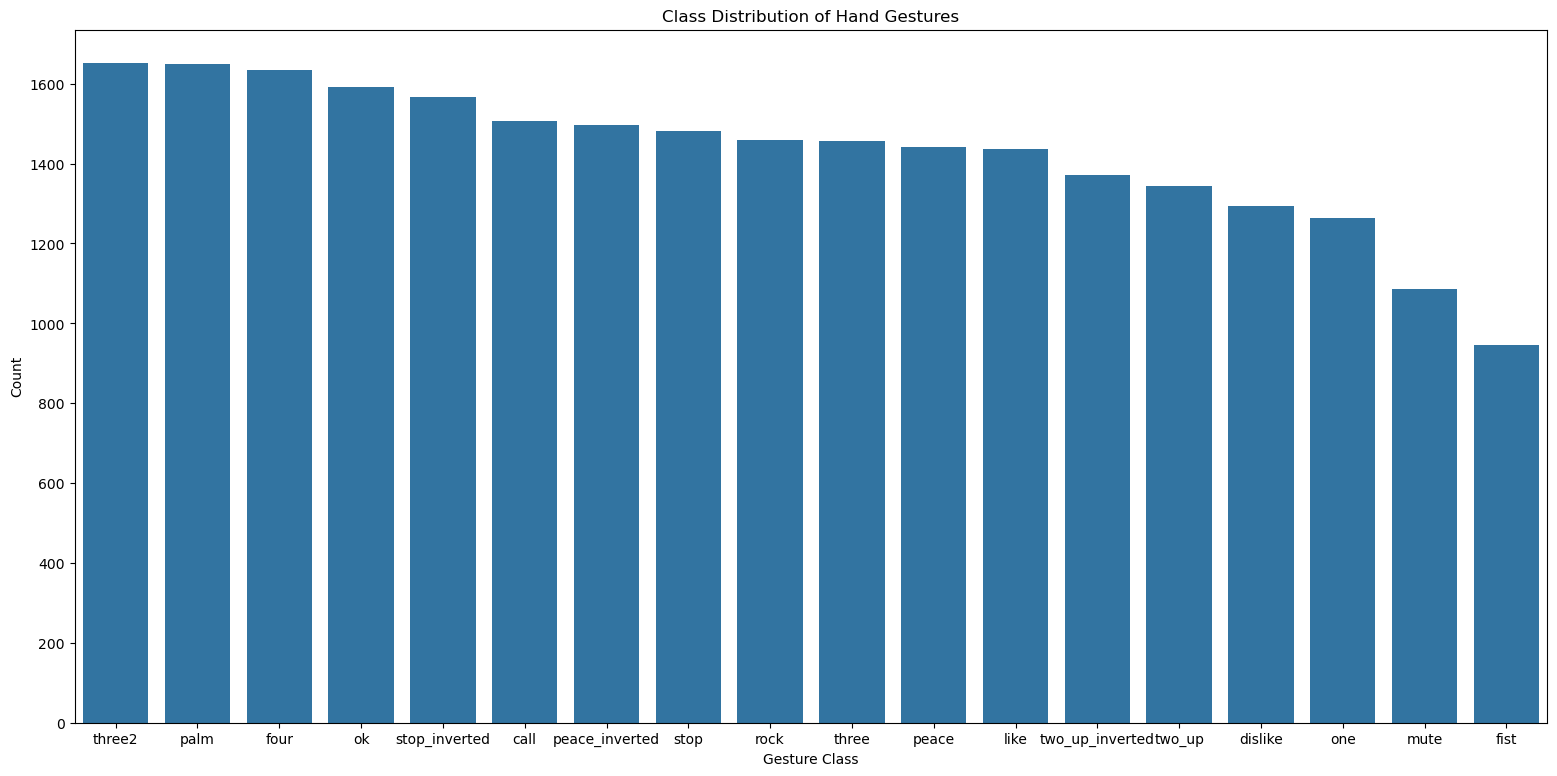

In [9]:
# Visualizing class distribution using a bar plot
plt.figure(figsize=(19, 9))
sns.barplot(x=raw_data["label"].value_counts().index, y=raw_data["label"].value_counts().values)
plt.xticks(rotation=360)
plt.xlabel("Gesture Class")
plt.ylabel("Count")
plt.title("Class Distribution of Hand Gestures")
plt.show()

# **Data Preprocessing**

In [10]:
# Checking the columns with null values
print(raw_data.isna().sum().sum())

0


In [11]:
# Checking the number of duplicated rows in the dataset
print(raw_data.duplicated().sum())

0


## Visualizing Distribution and Outliers of Numeric Features Using Boxplots

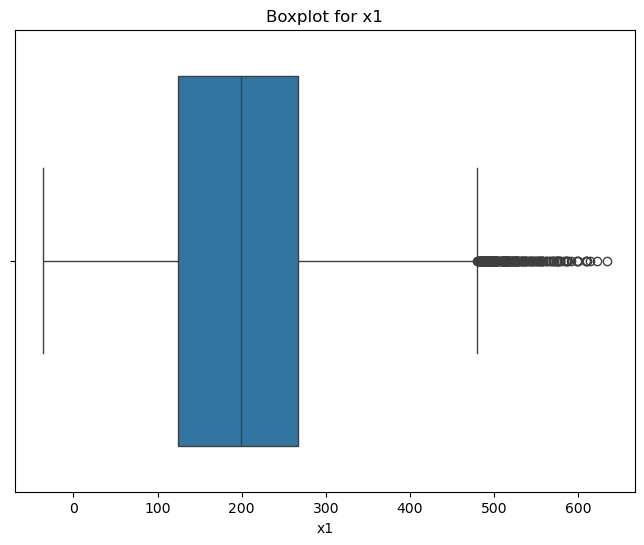

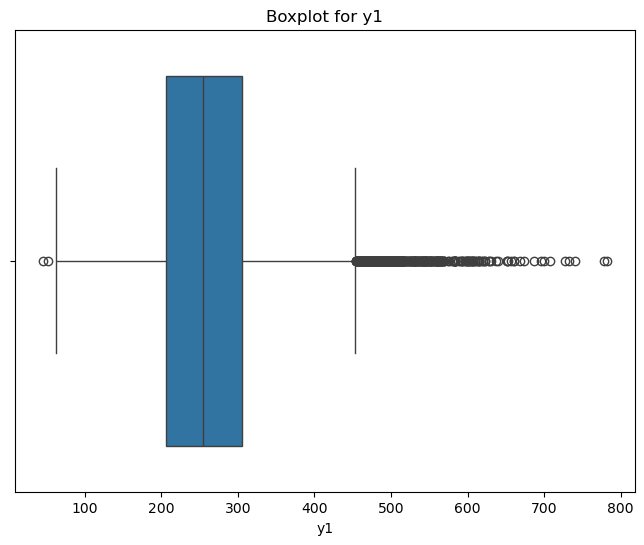

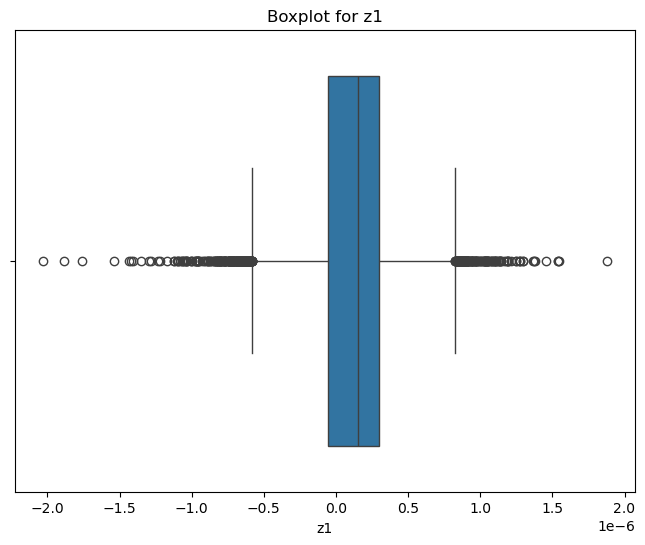

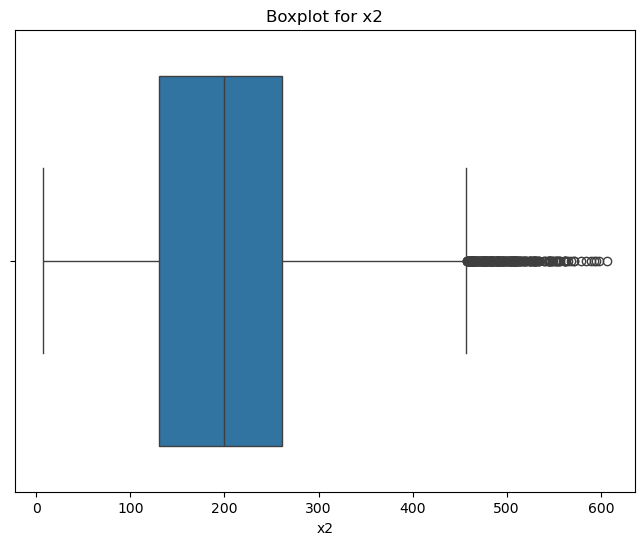

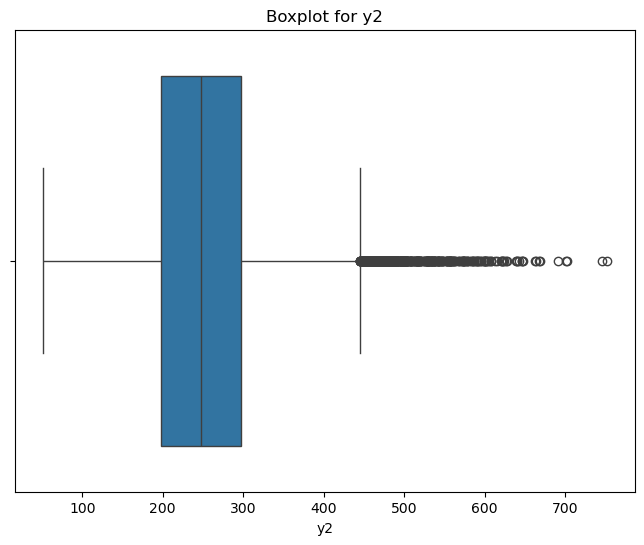

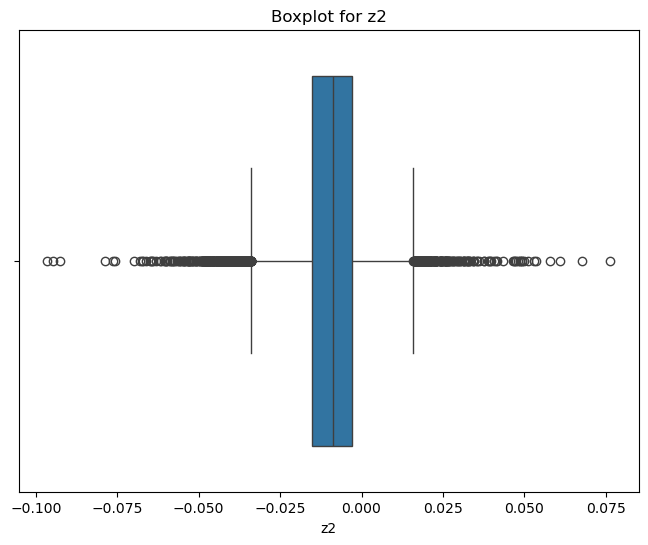

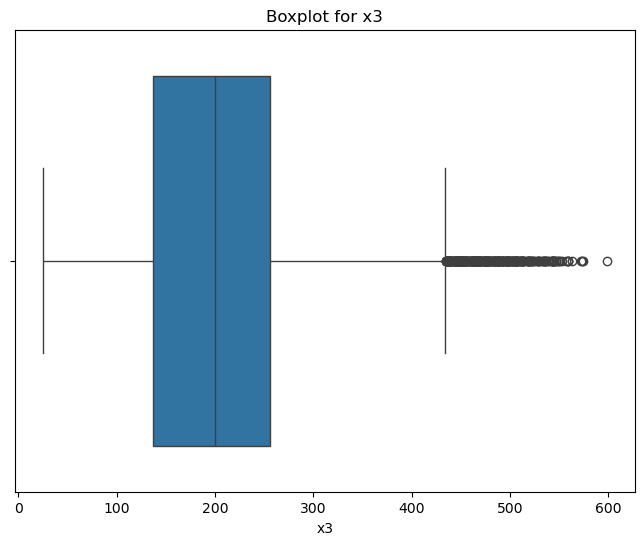

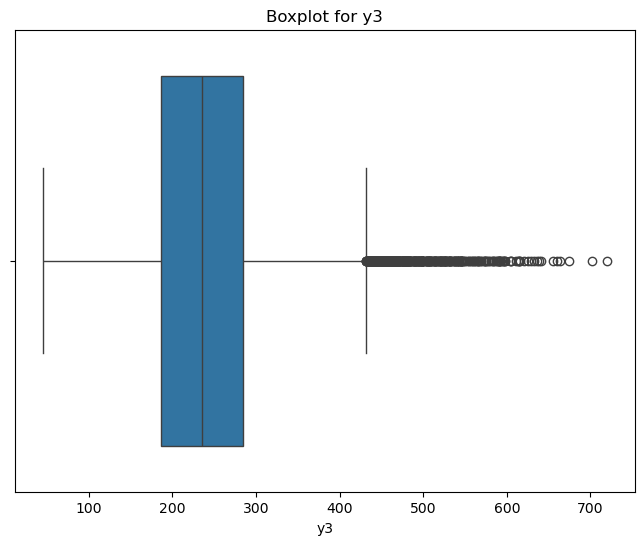

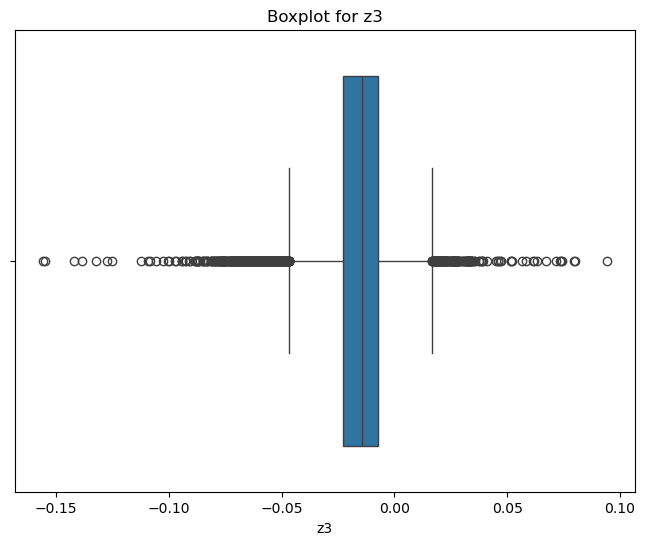

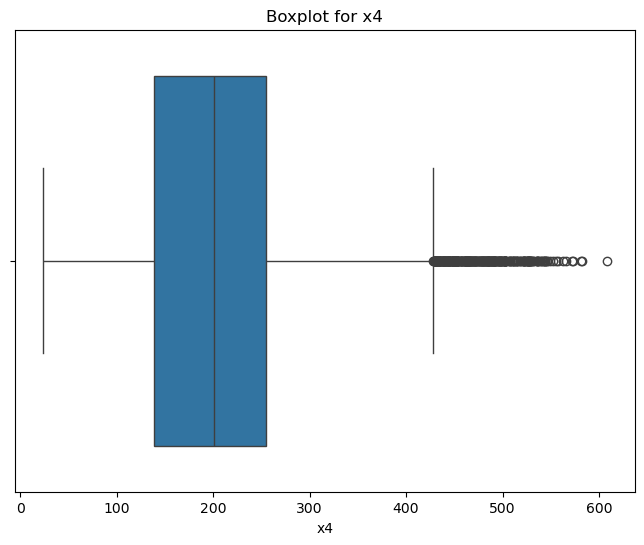

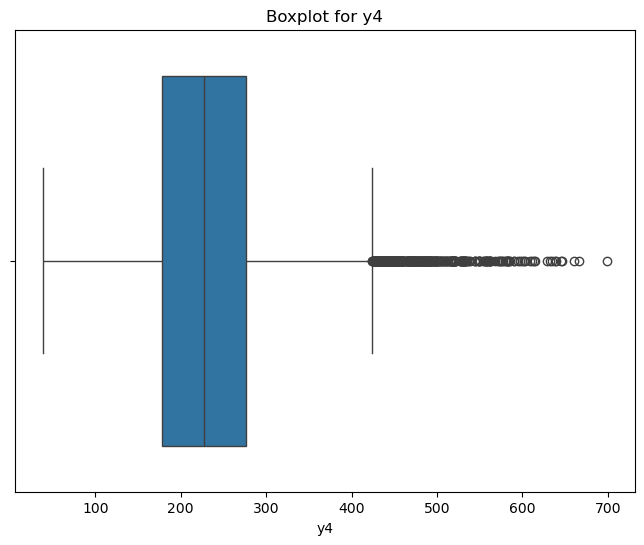

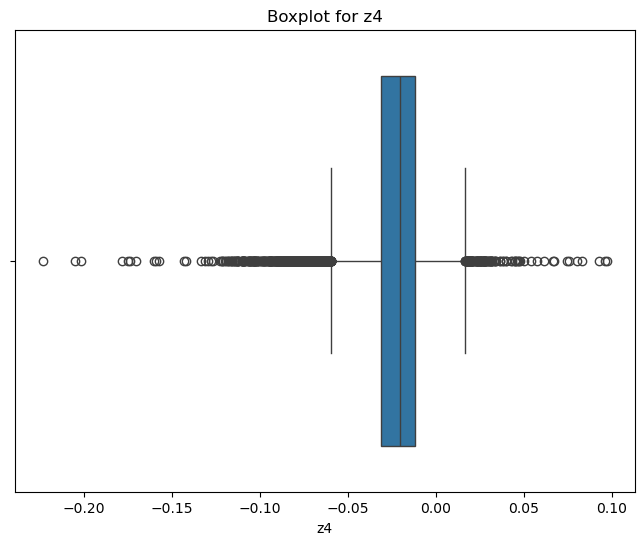

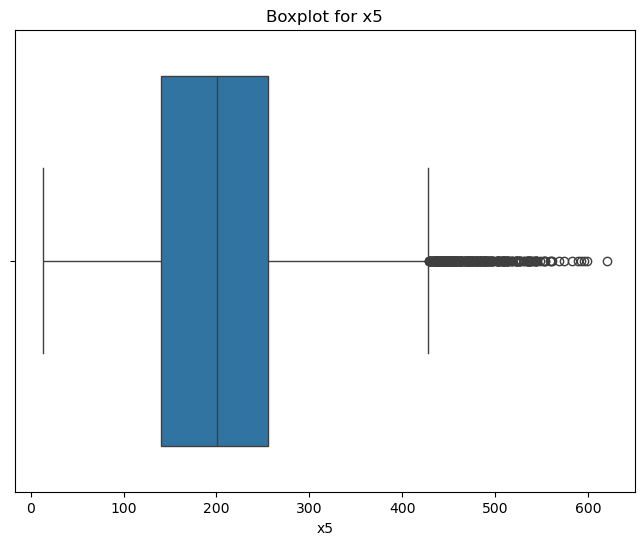

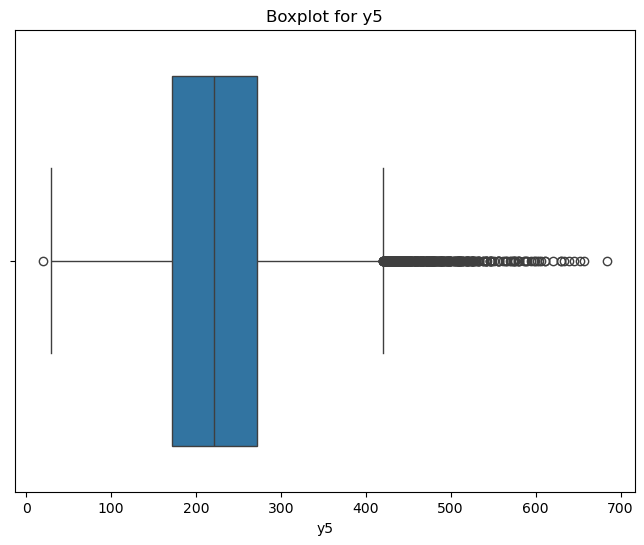

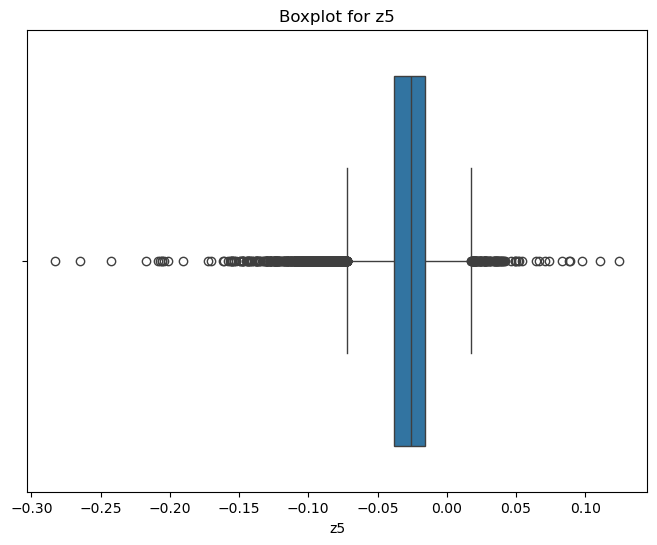

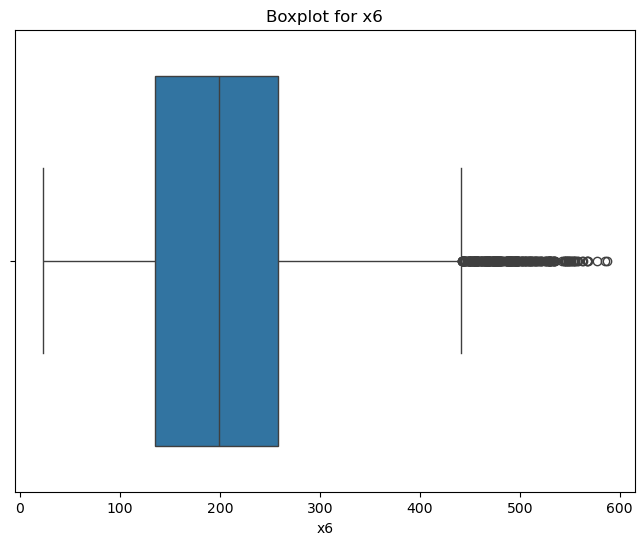

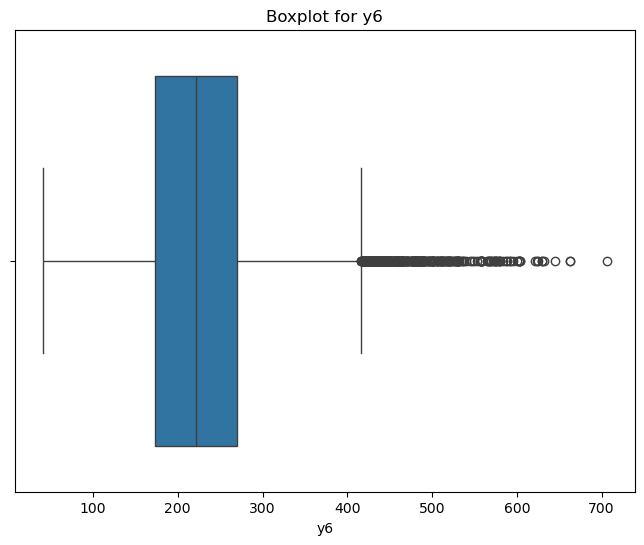

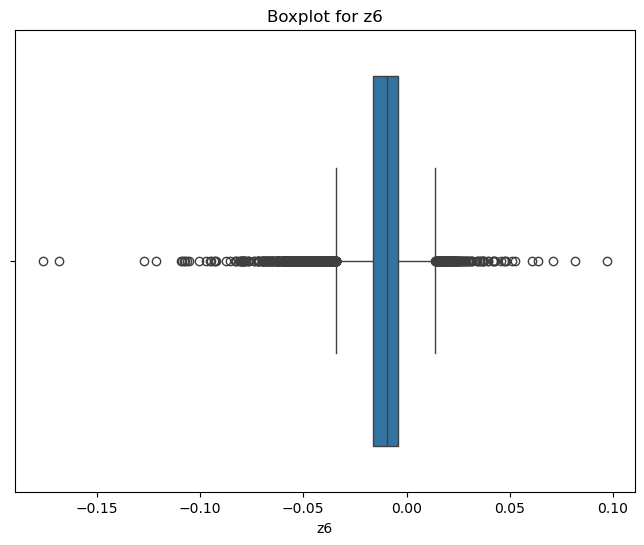

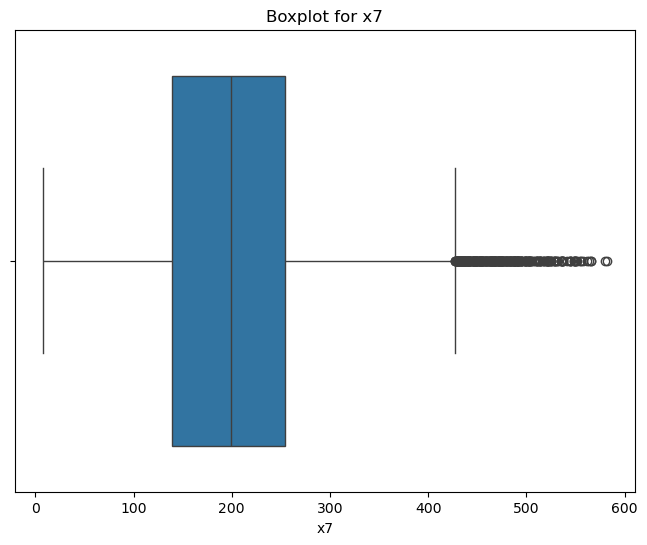

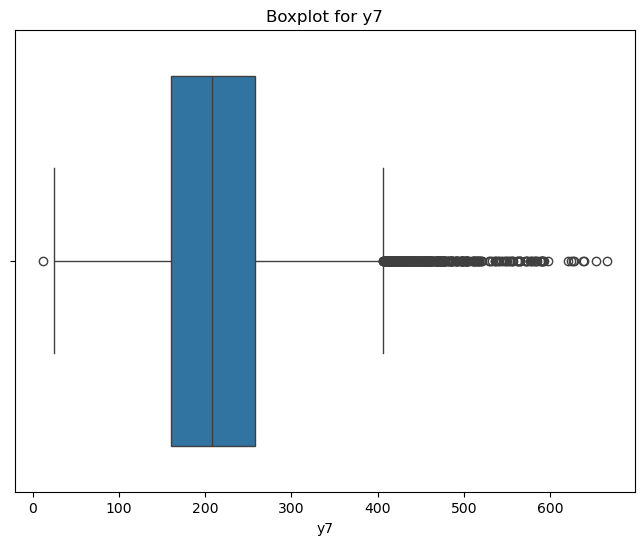

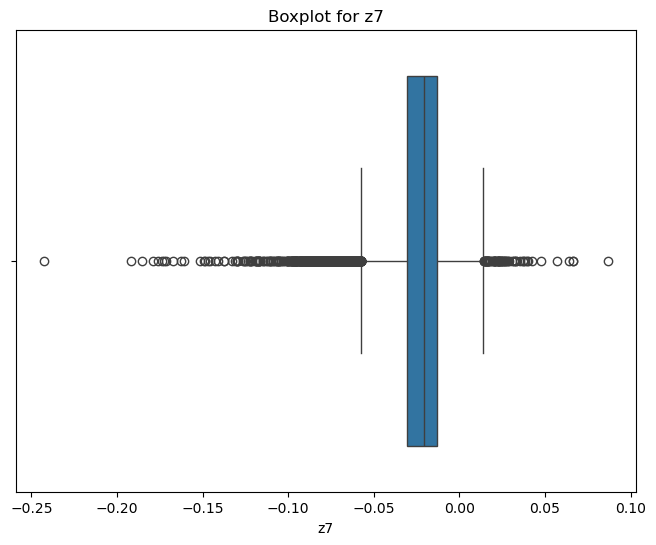

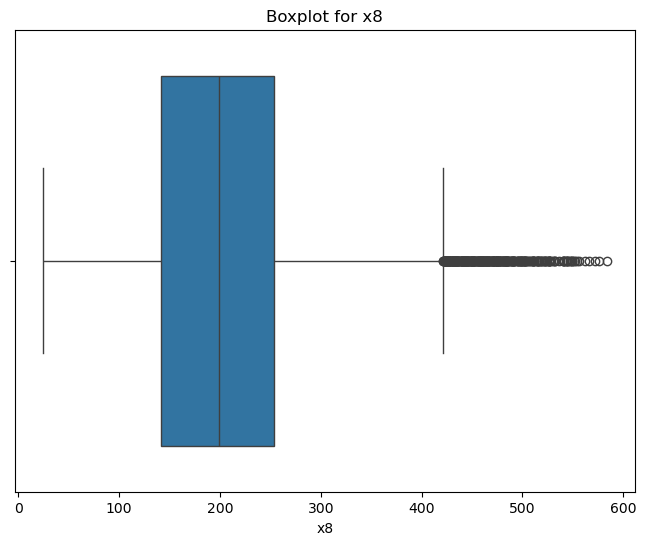

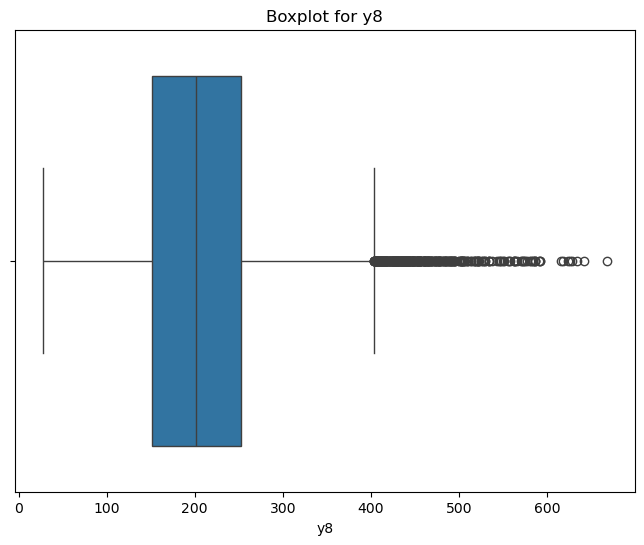

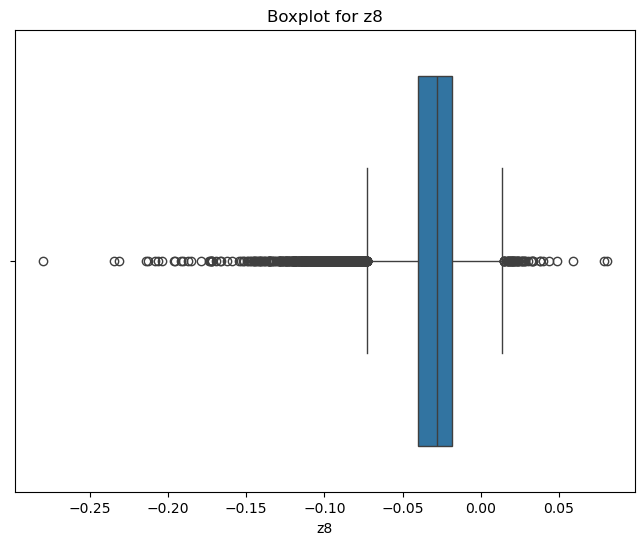

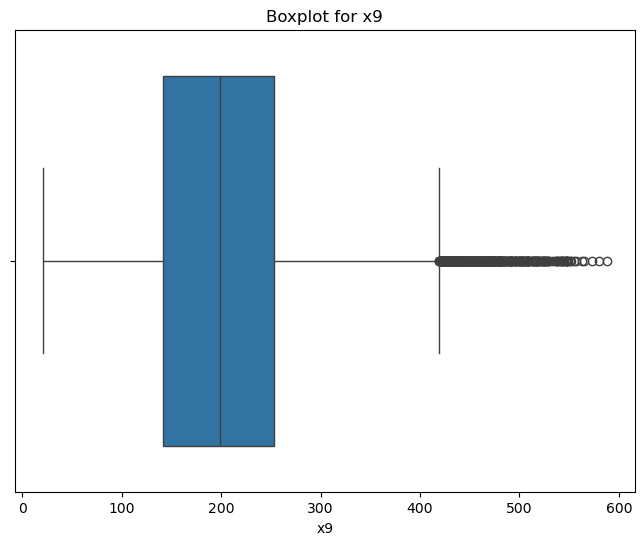

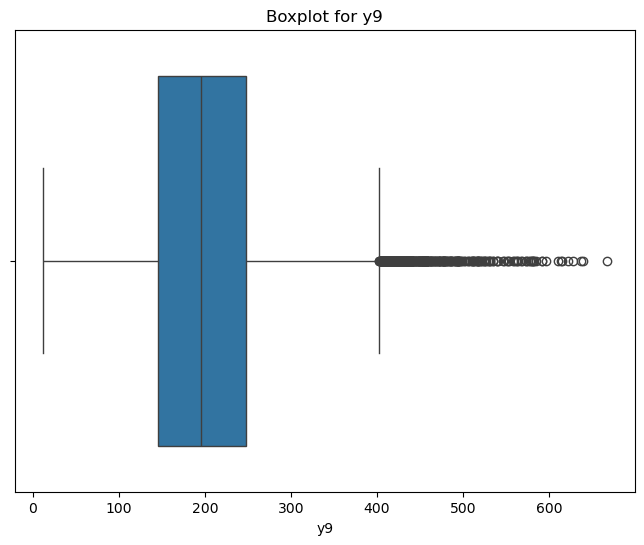

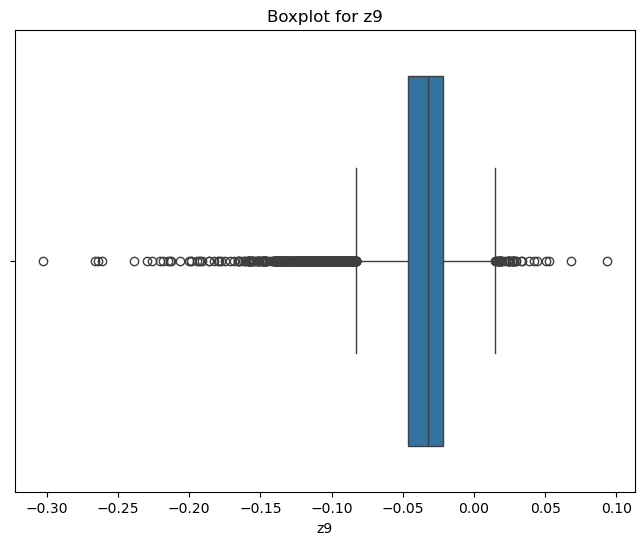

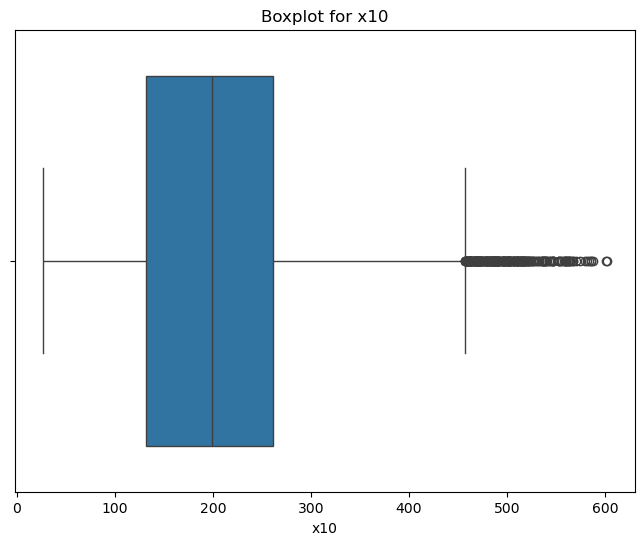

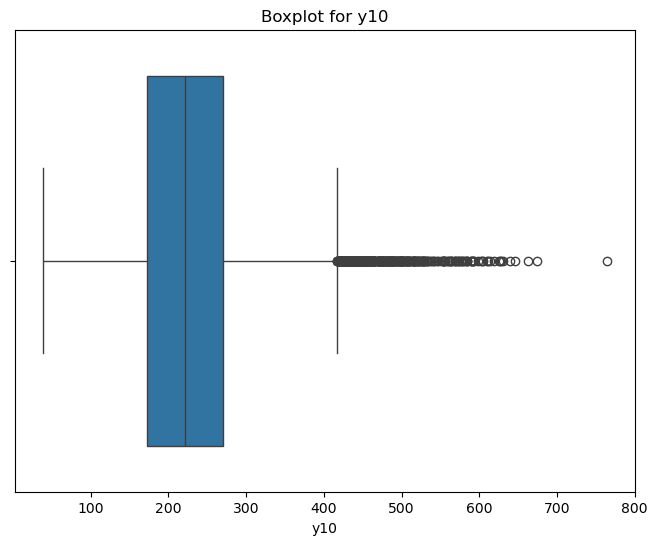

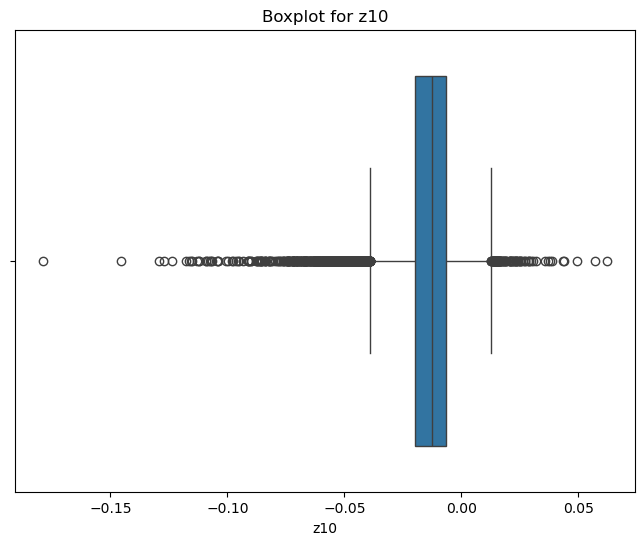

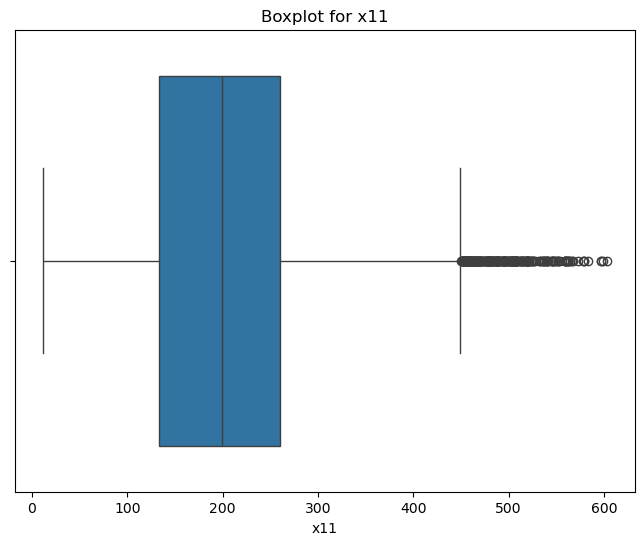

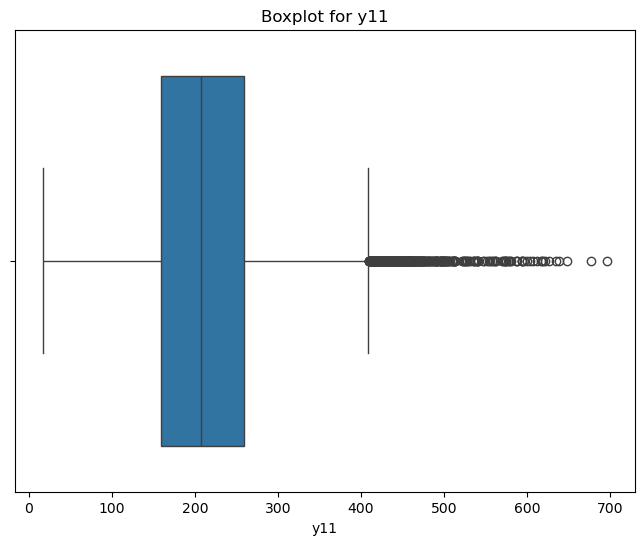

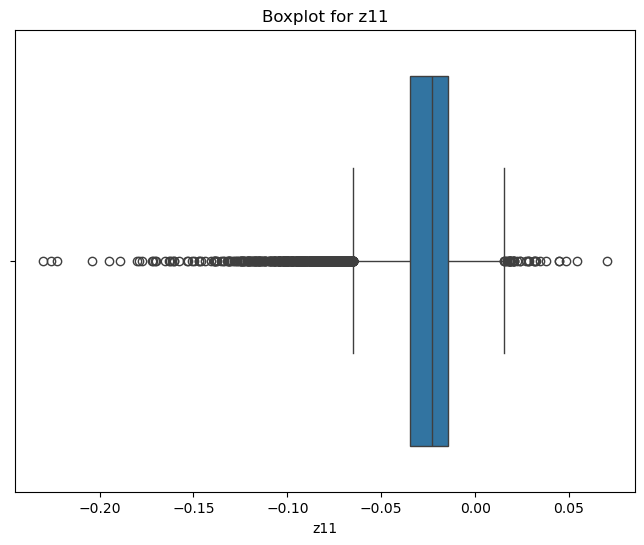

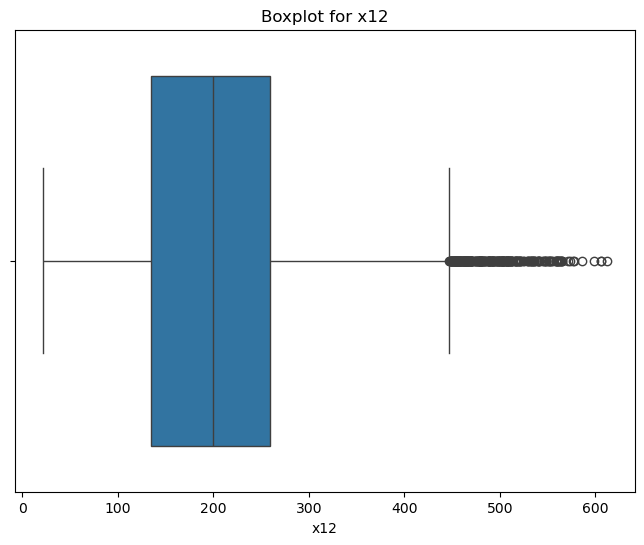

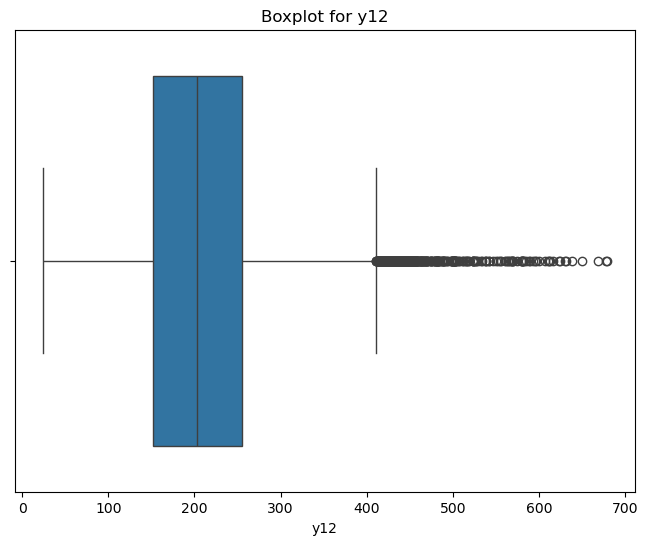

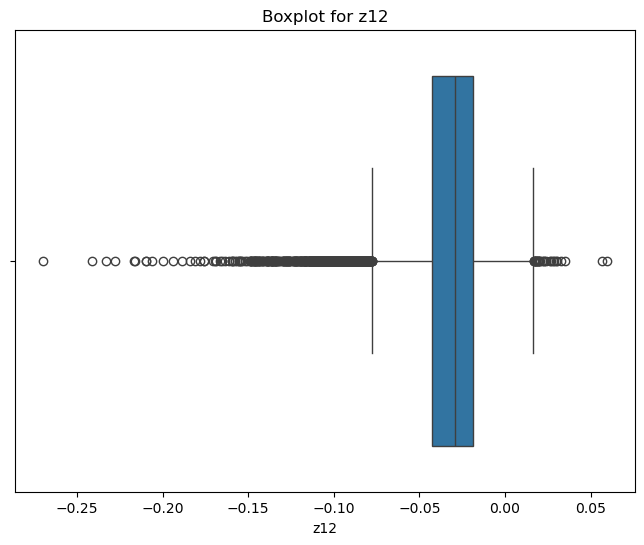

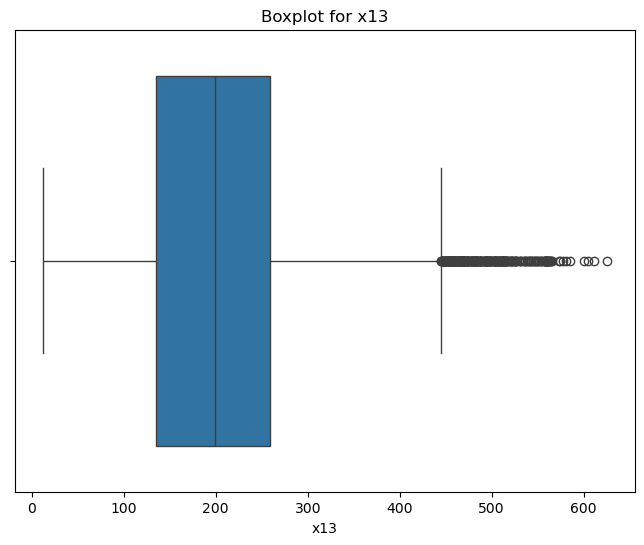

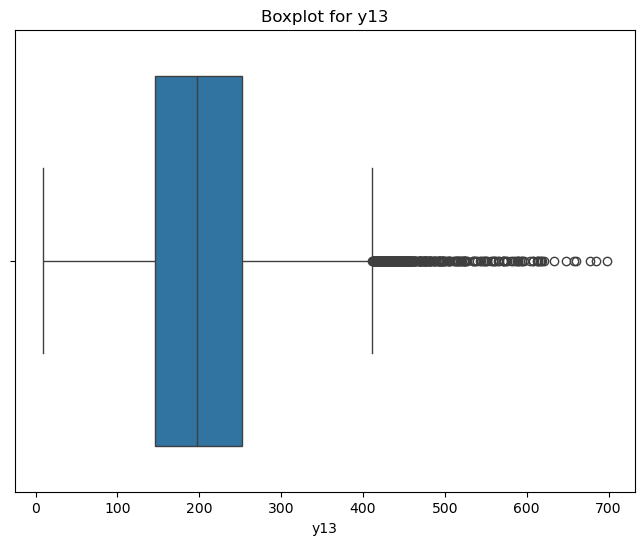

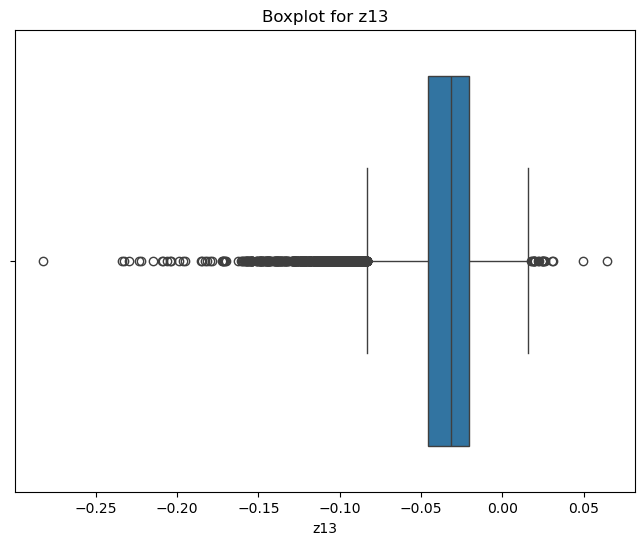

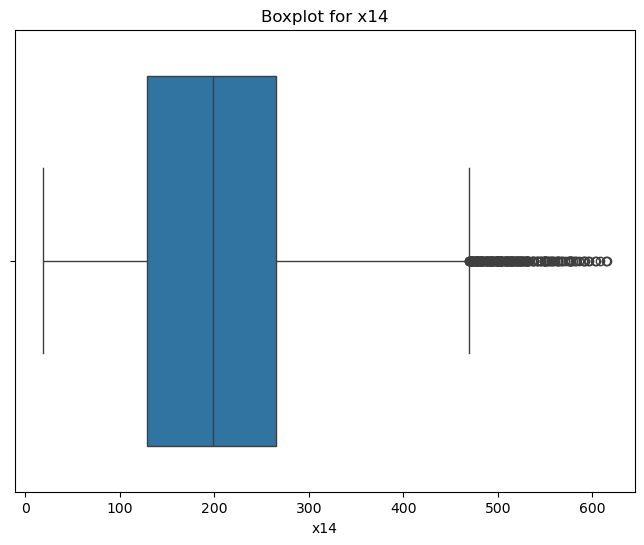

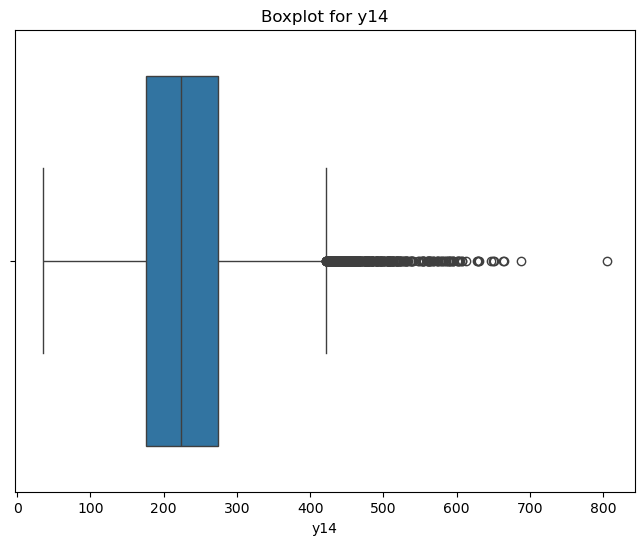

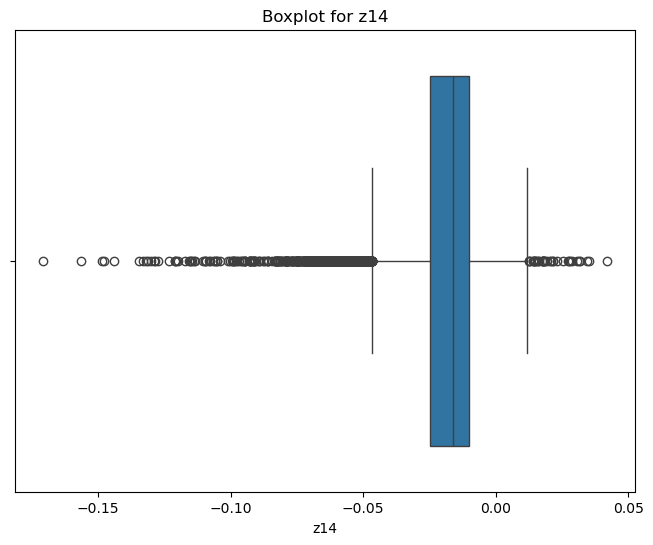

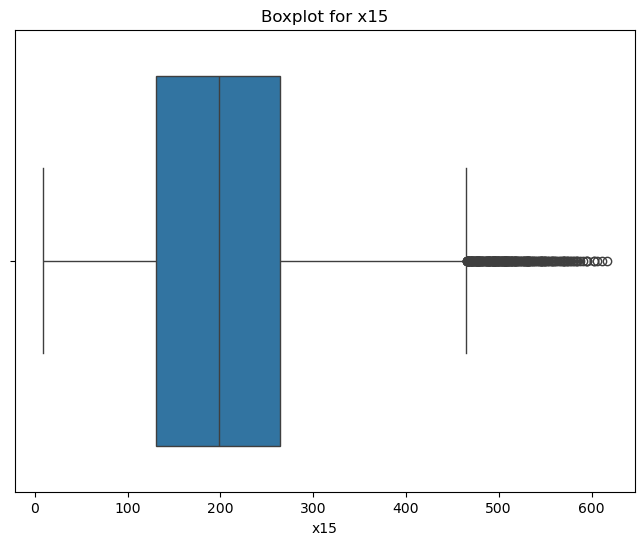

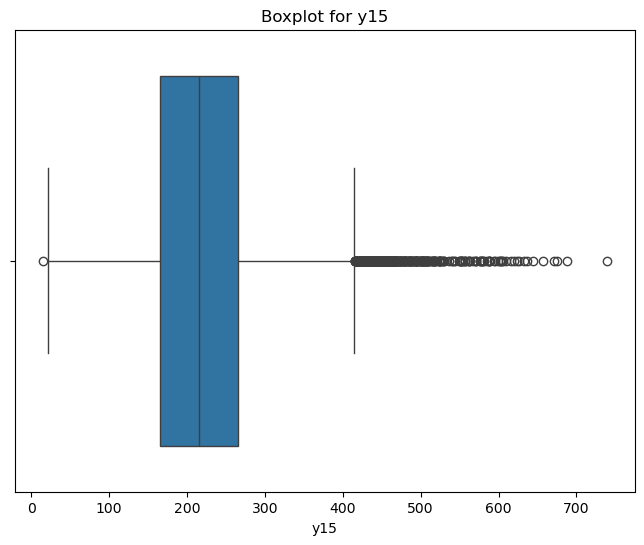

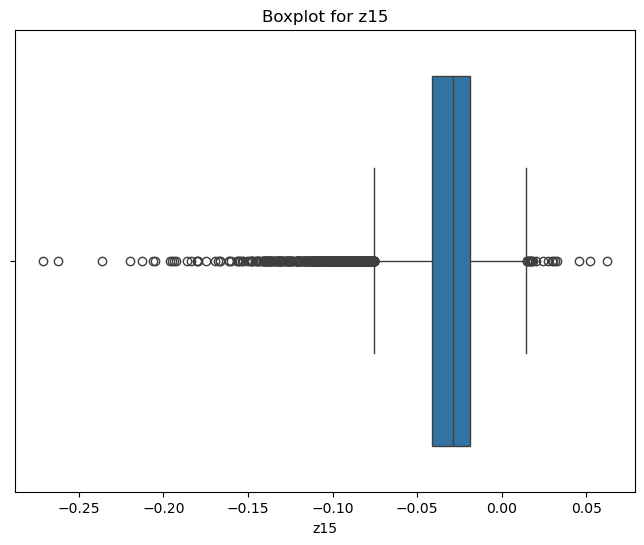

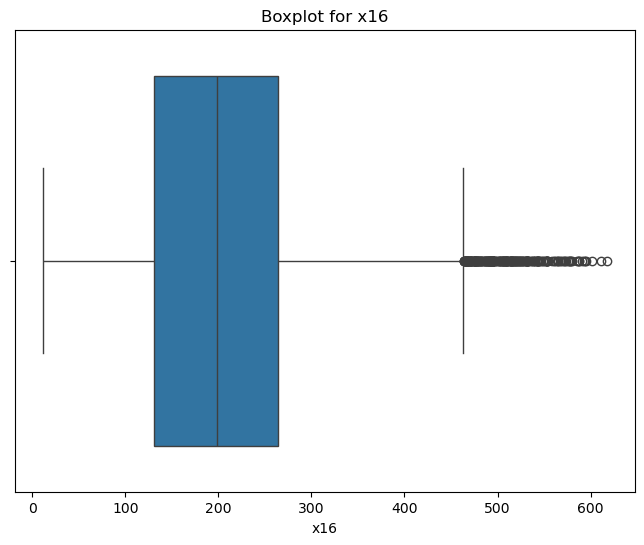

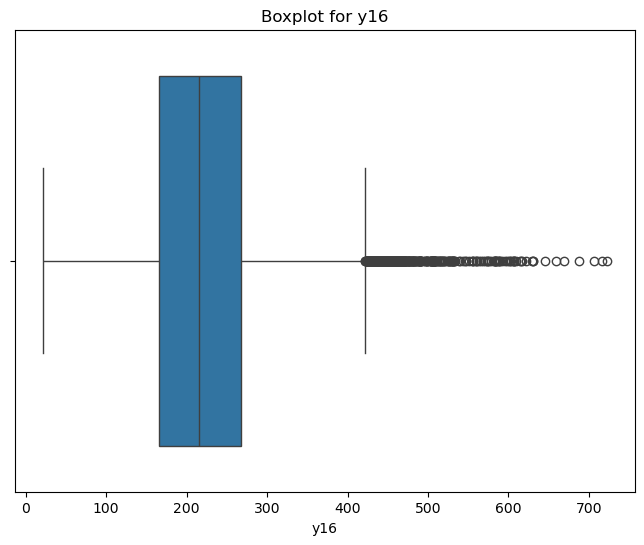

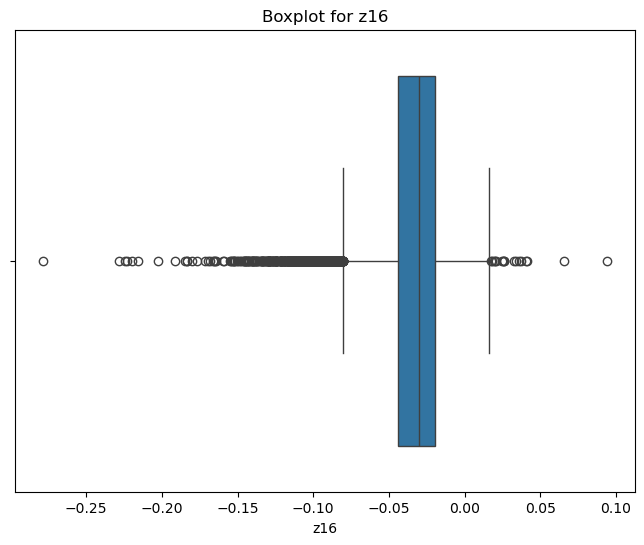

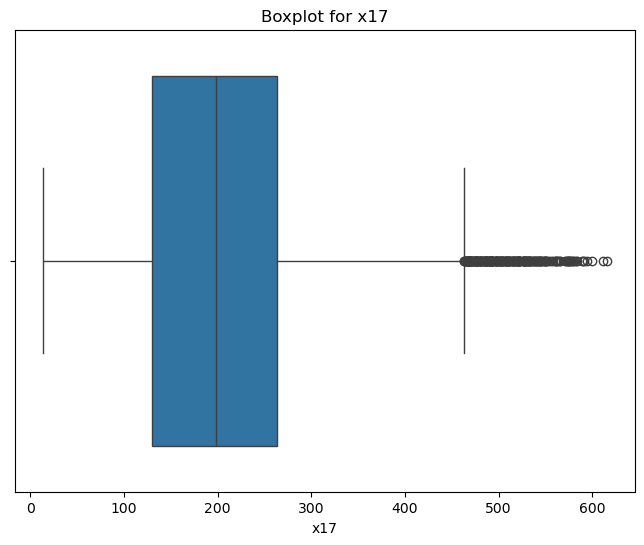

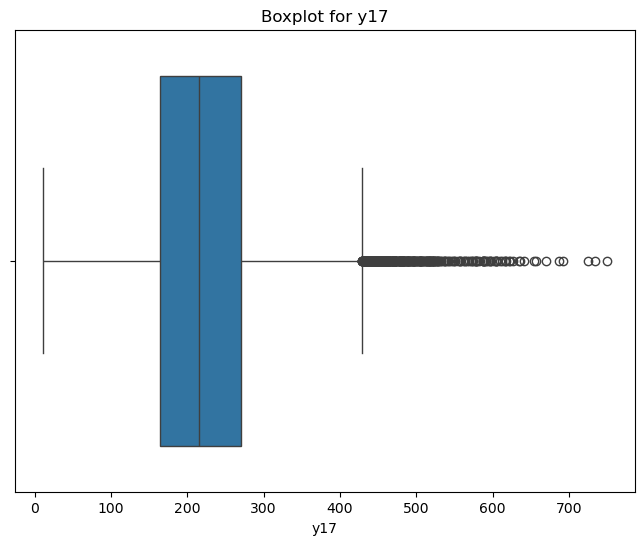

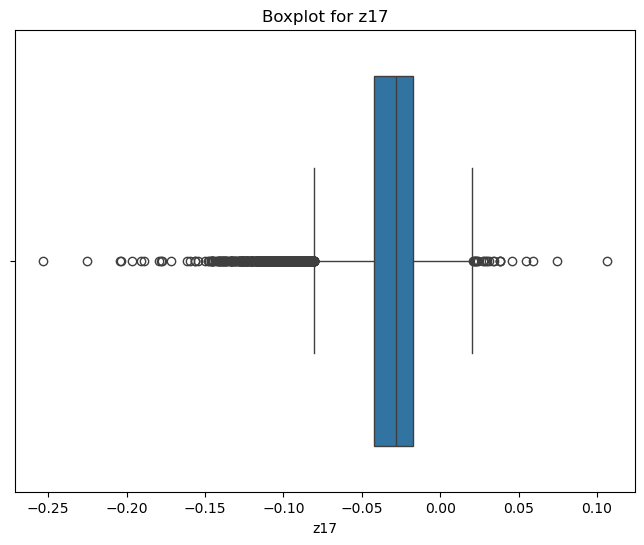

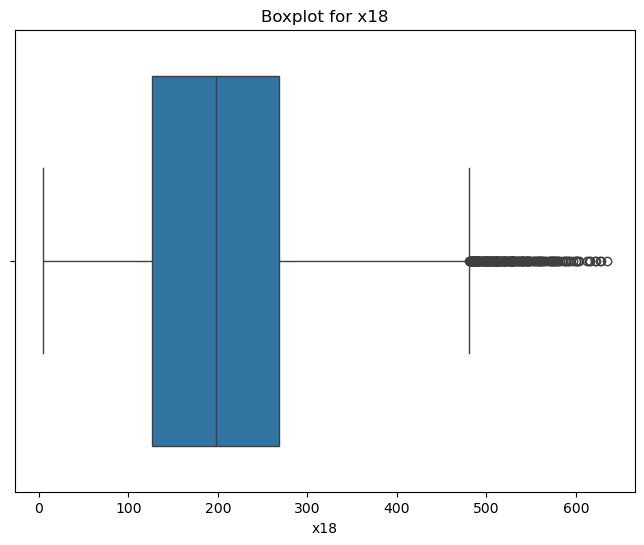

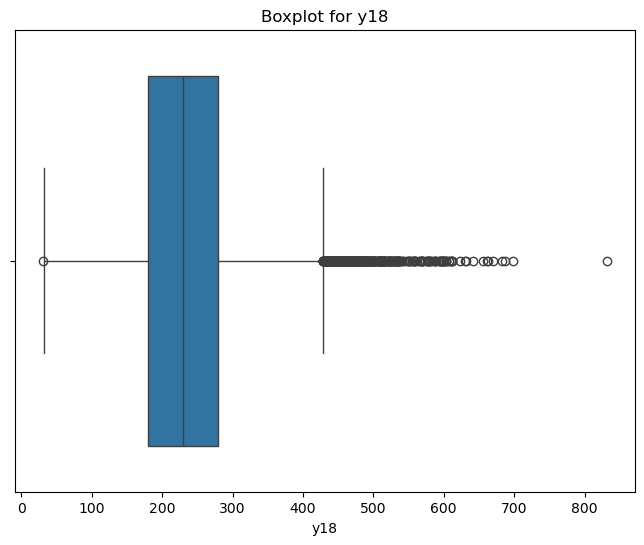

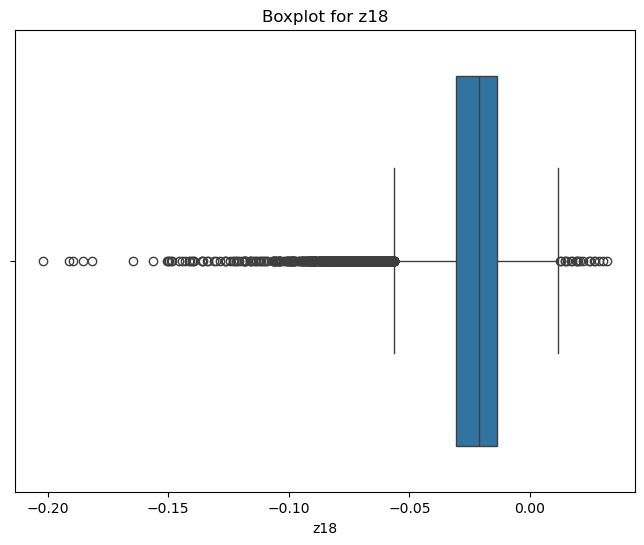

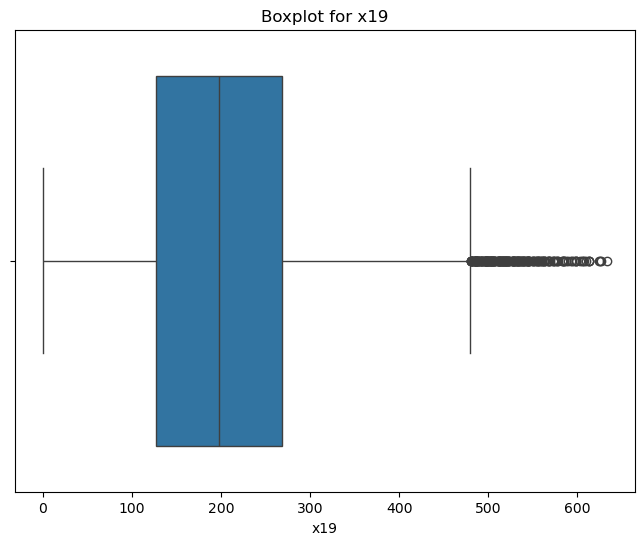

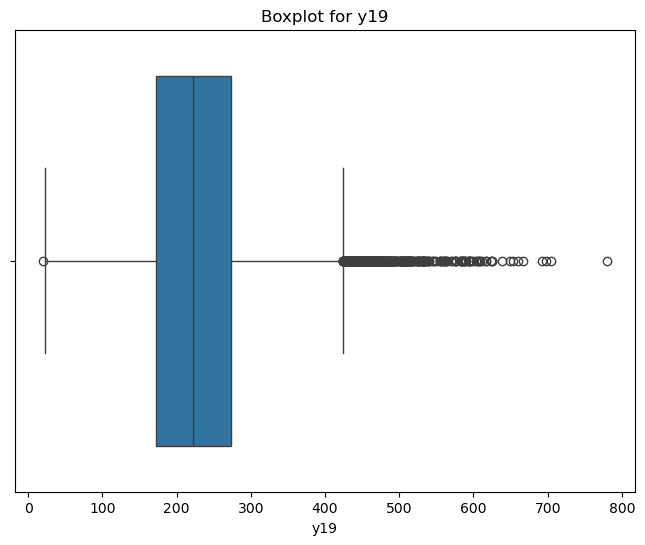

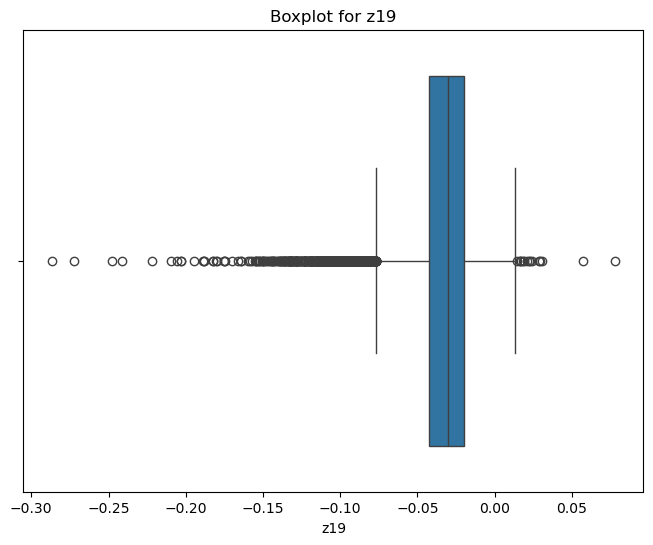

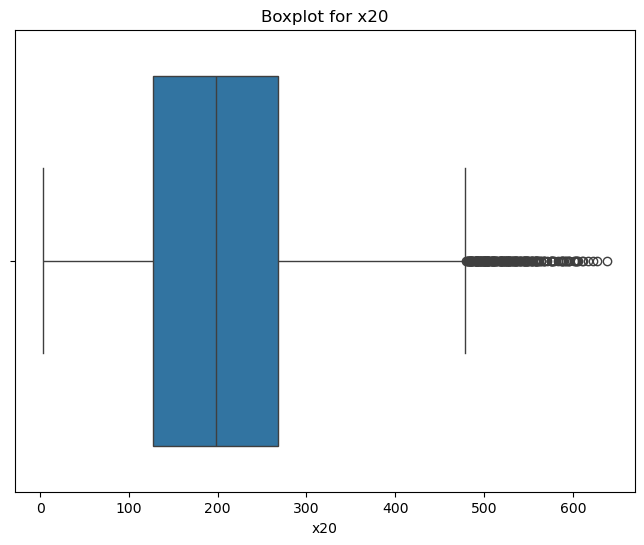

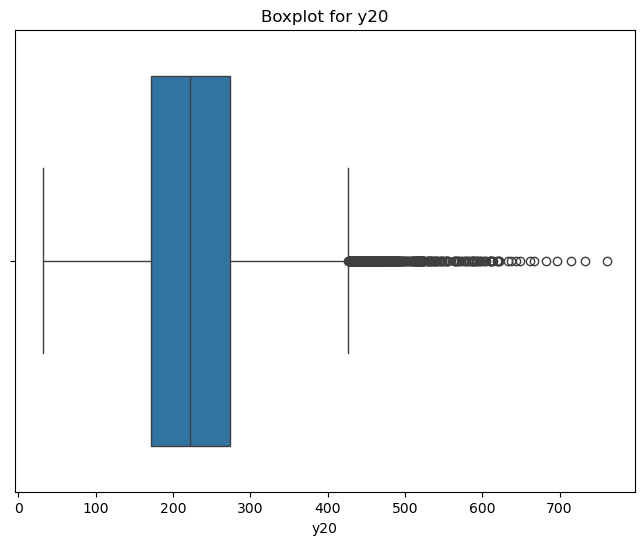

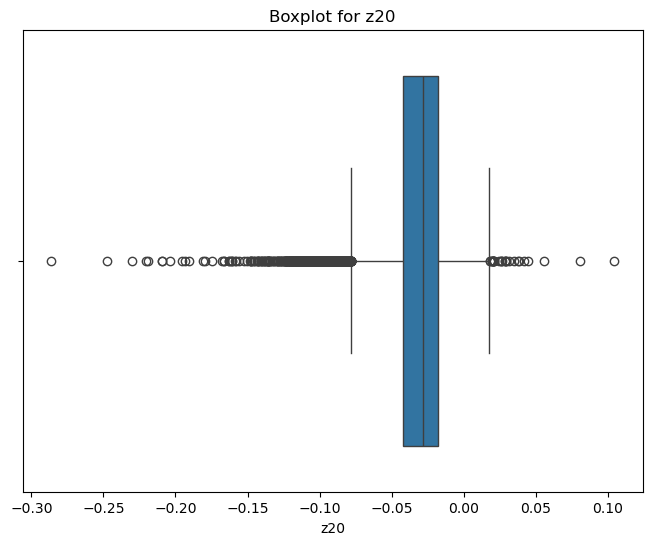

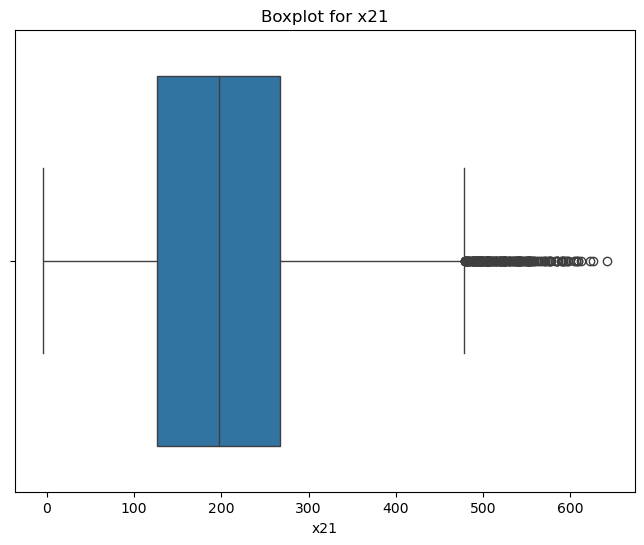

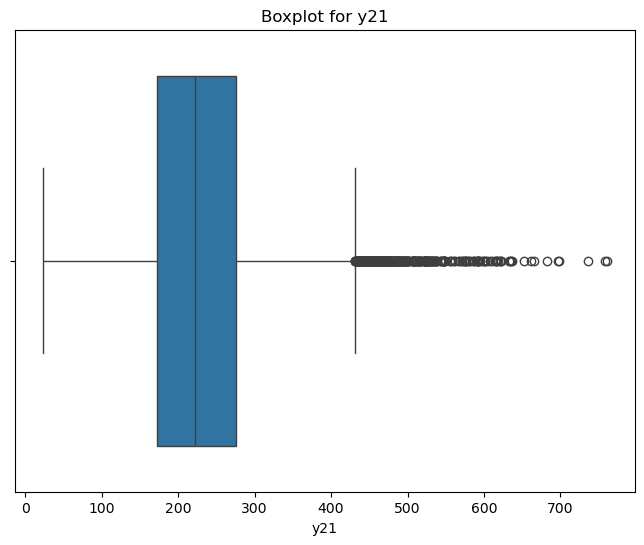

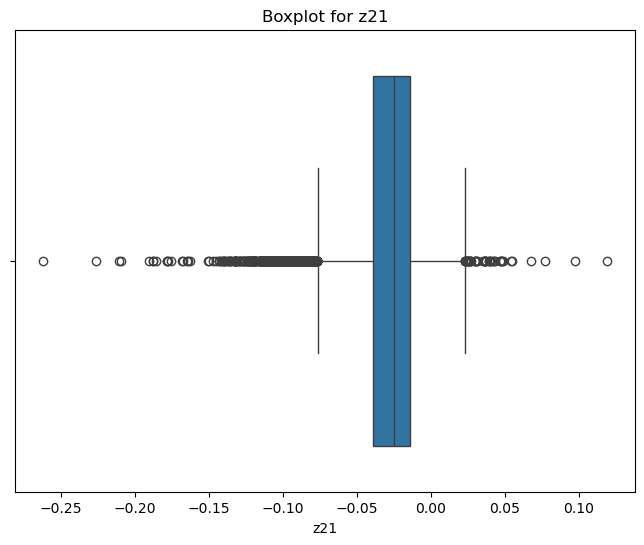

In [12]:
for column in raw_data.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=raw_data[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

## Visualizing Features Distribution

In [13]:
def plot_feature_distributions(data, columns_per_row=5):
    """
    Plots the distribution of numeric features in the given dataset.

    Parameters:
    - data: pandas DataFrame containing the data.
    - columns_per_row: Number of subplots (columns) per row in the grid (default: 5).
    """
    # Select the numeric columns
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

    # Determine the number of rows for the subplots based on the number of numeric columns
    num_rows = (len(numeric_columns) // columns_per_row) + (len(numeric_columns) % columns_per_row > 0)

    # Create subplots with the specified number of rows and columns
    plt.figure(figsize=(15, num_rows * 4))


    # Loop through each numeric feature and plot its distribution
    for i, column in enumerate(numeric_columns):
        plt.subplot(num_rows, columns_per_row, i + 1)
        sns.histplot(data[column], kde=True)
        plt.title(f'Distribution of {column}')

    plt.tight_layout()
    plt.show()

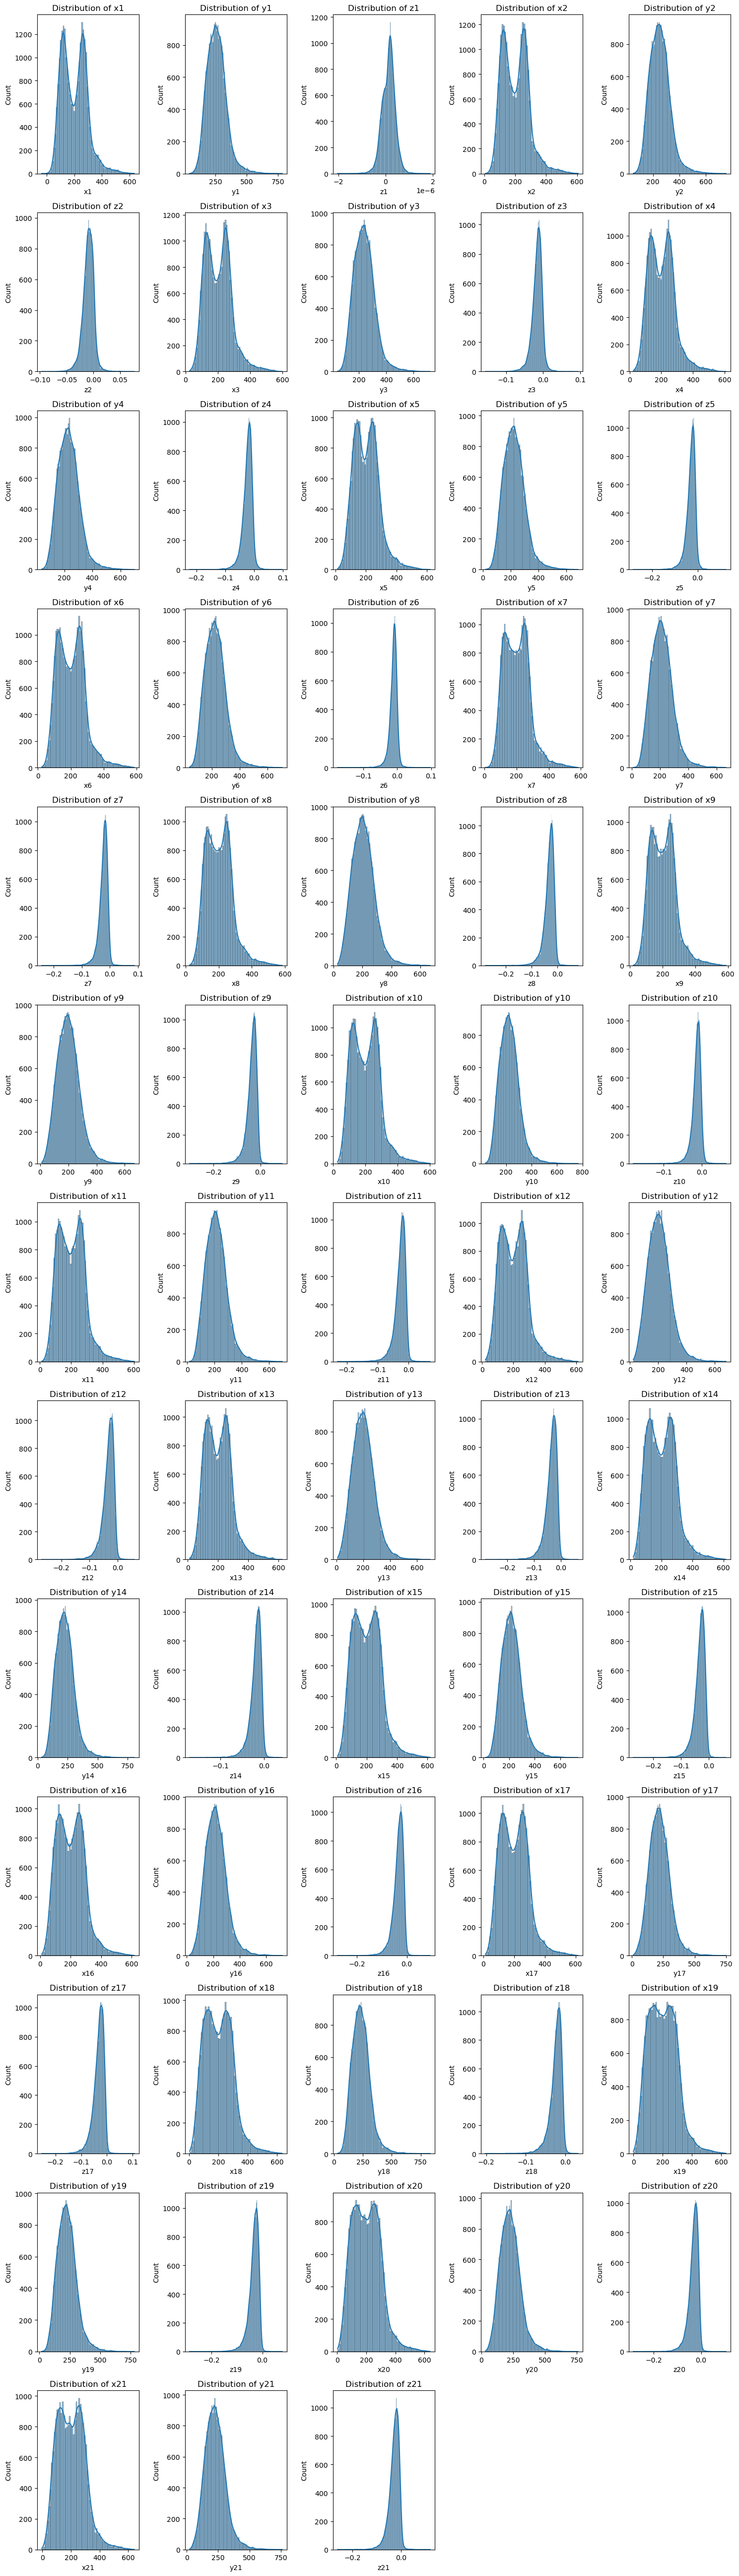

In [14]:
plot_feature_distributions(raw_data)

## Visualizing Hand Landmarks for Different Gesture Classes in the Dataset

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hand_landmarks(df, sample_index=0):
    """
    Visualizes the hand landmarks (x, y) for a given sample.

    Parameters:
    df (DataFrame): The dataset containing hand landmarks.
    sample_index (int): The index of the sample to visualize.
    """
    # Select the sample
    sample = df.iloc[sample_index]

    # Extract x and y coordinates for all 21 landmarks
    x_points = [sample[f'x{i}'] for i in range(1, 22)]
    y_points = [sample[f'y{i}'] for i in range(1, 22)]

    # Define landmark connections (to draw the hand structure)
    connections = [
        (0, 1), (1, 2), (2, 3), (3, 4),  # Thumb
        (0, 5), (5, 6), (6, 7), (7, 8),  # Index finger
        (5, 9), (9, 10), (10, 11), (11, 12),  # Middle finger
        (9, 13), (13, 14), (14, 15), (15, 16),  # Ring finger
        (0, 17), (13, 17), (17, 18), (18, 19), (19, 20)  # Pinky finger
    ]

    # Plot hand landmarks
    plt.figure(figsize=(6, 6))
    plt.scatter(x_points, y_points, color='red', label="Keypoints")  # Plot keypoints

    for connection in connections:
        x1, y1 = x_points[connection[0]], y_points[connection[0]]
        x2, y2 = x_points[connection[1]], y_points[connection[1]]
        plt.plot([x1, x2], [y1, y2], 'b', linewidth=2)  # Draw connections

    # Retrieve gesture label if it exists
    gesture_label = sample.get('label', 'Unknown Gesture')

    plt.title(f"Hand Landmarks Visualization (Sample {sample_index})\nGesture: {gesture_label}")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.gca().invert_yaxis()  # Invert Y-axis for better visualization
    plt.axis('equal')  # Ensure aspect ratio is equal for proper visualization
    plt.legend()
    plt.show()


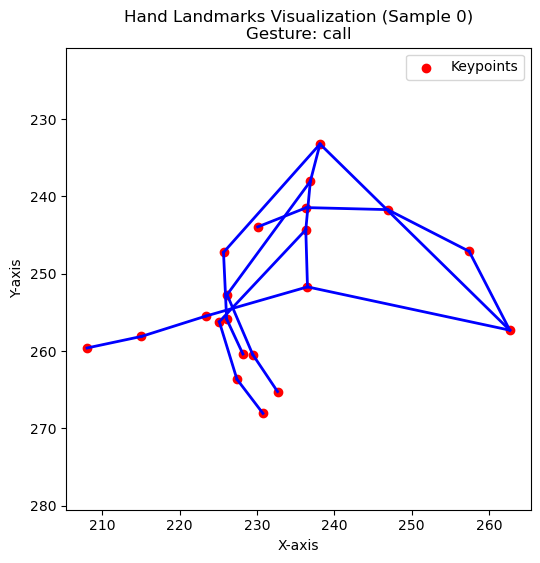

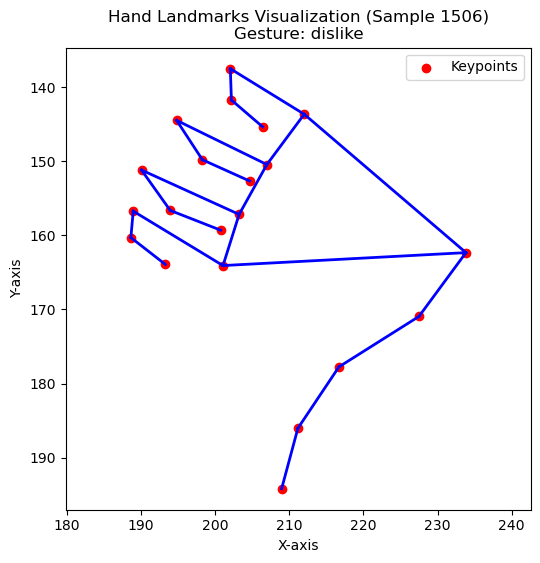

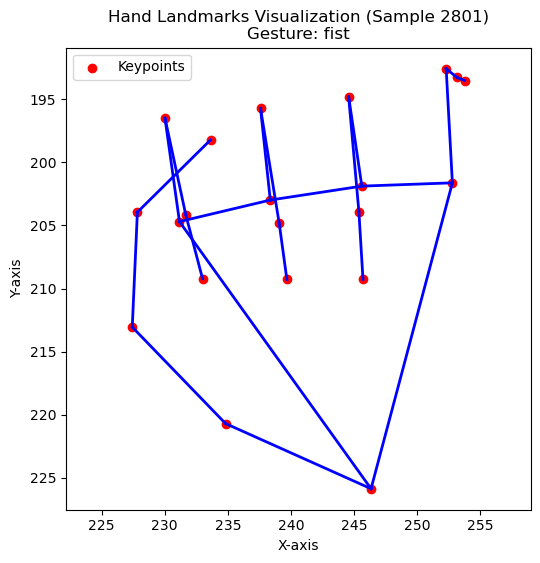

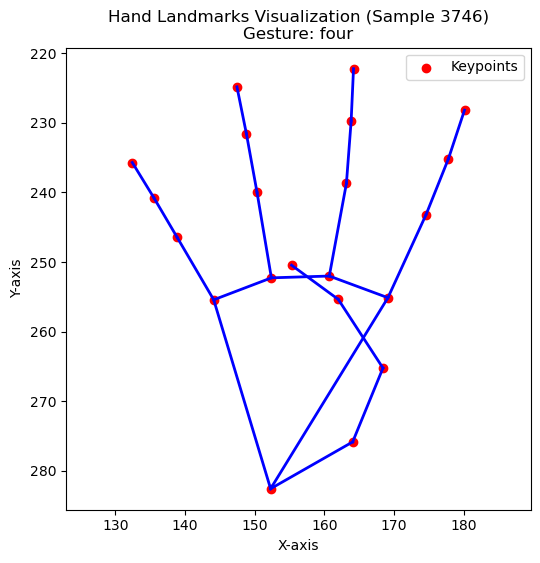

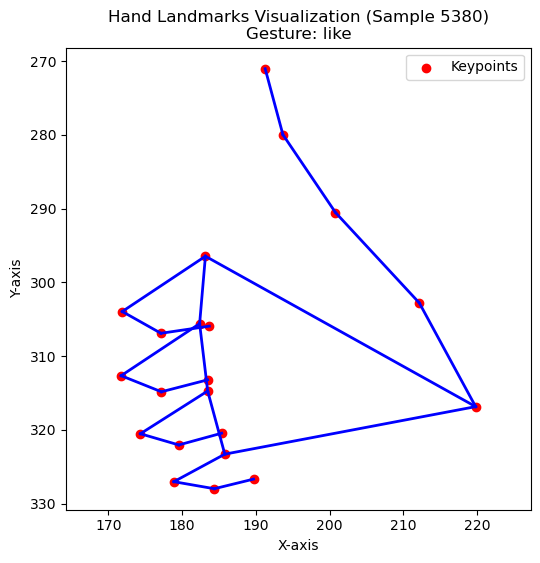

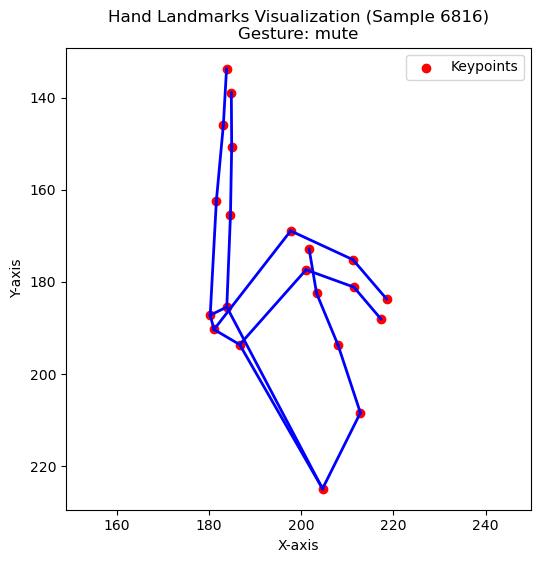

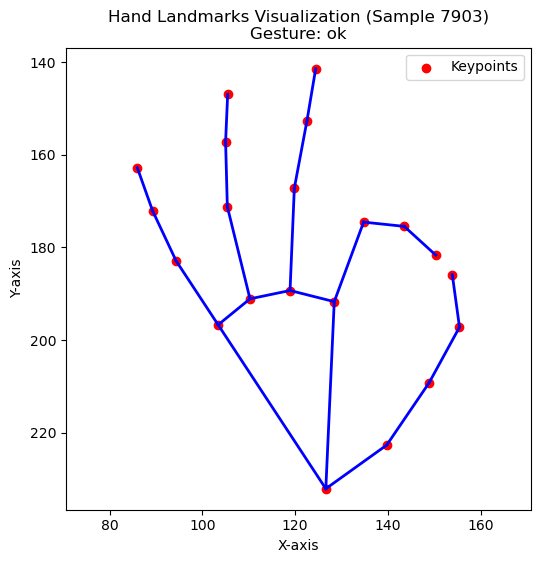

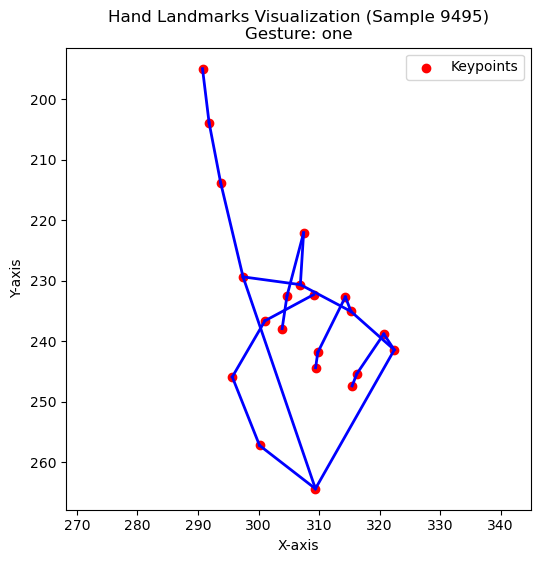

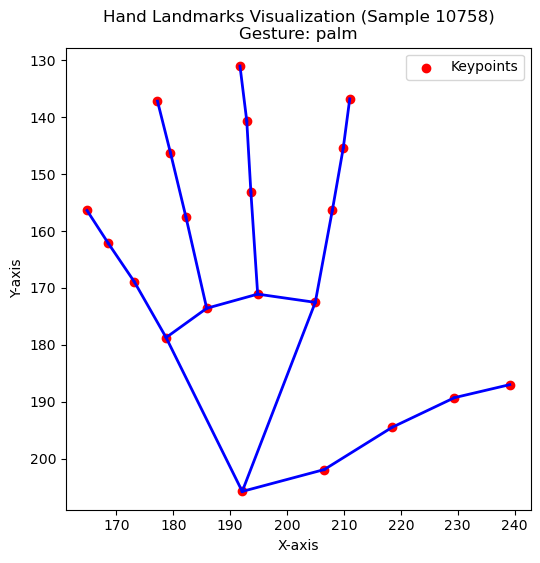

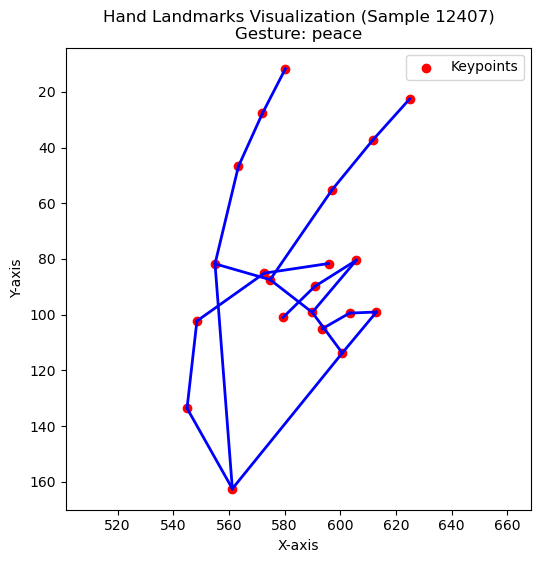

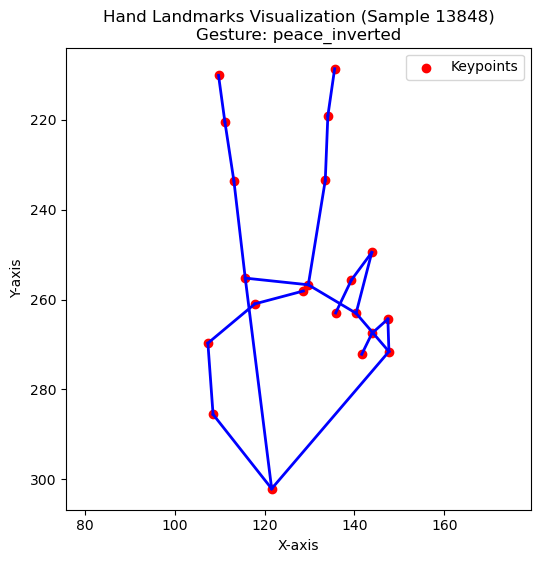

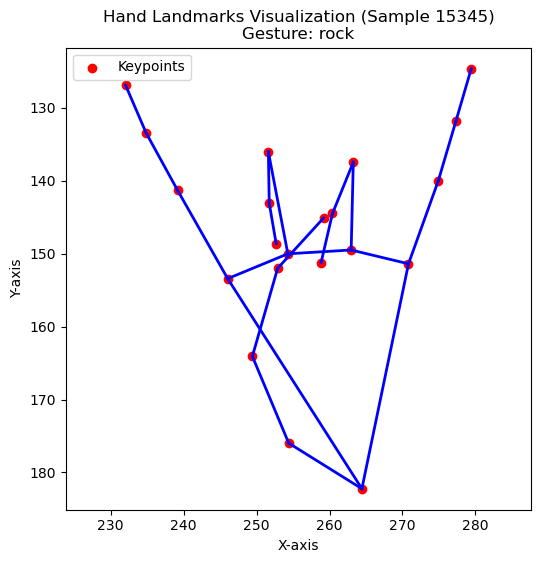

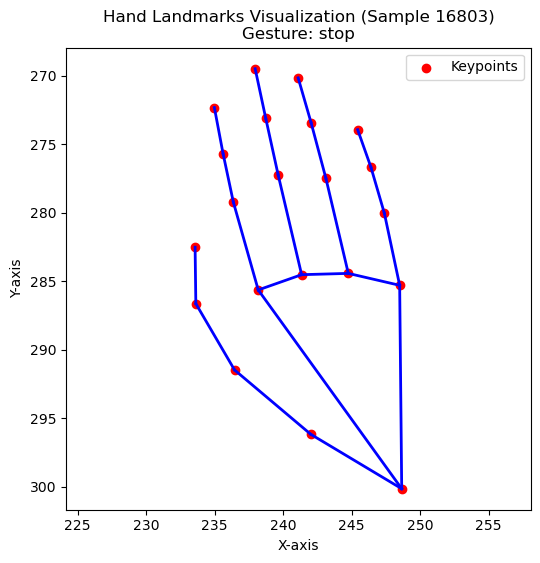

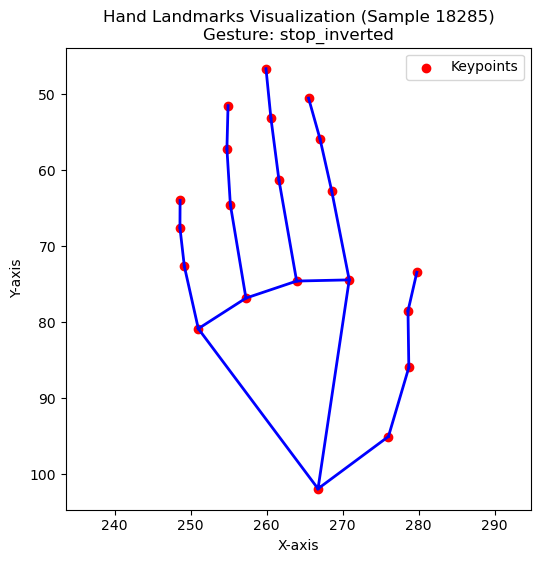

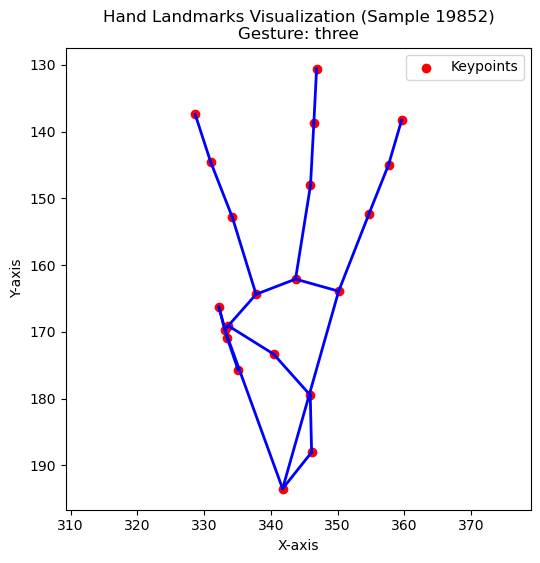

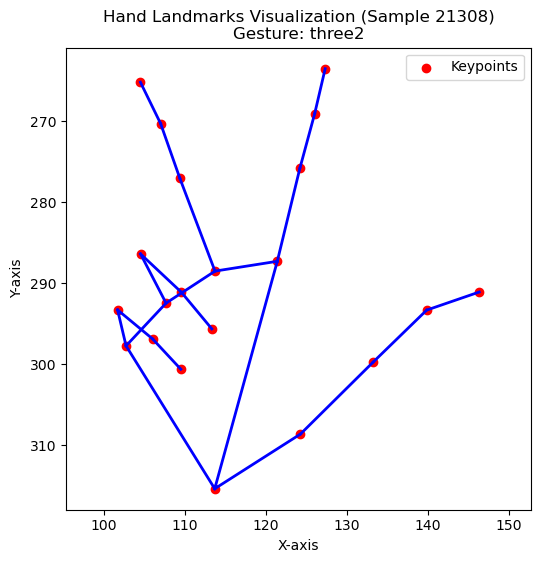

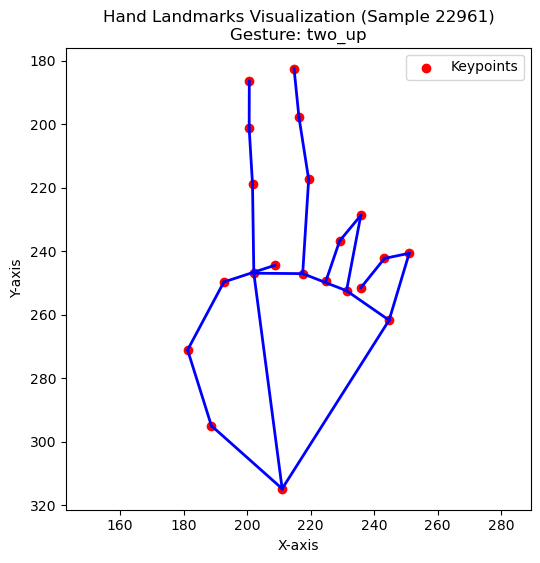

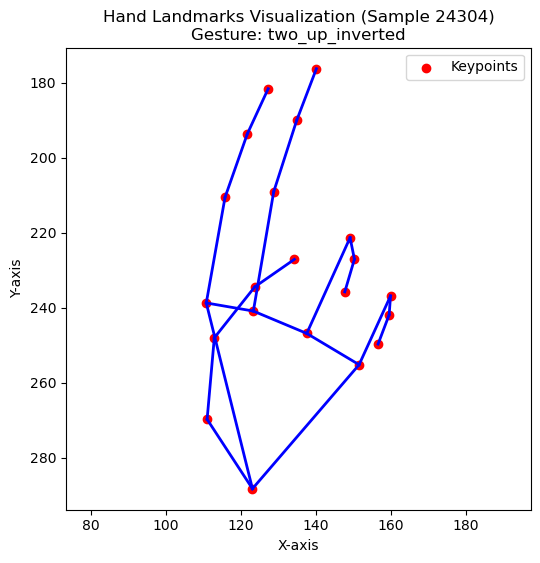

In [16]:
unique_classes = raw_data['label'].unique()

for class_label in unique_classes:
    sample_index = raw_data[raw_data['label'] == class_label].index[0]

    plot_hand_landmarks(raw_data, sample_index)

# Label Mapping for future use

In [93]:
label_mapping = {label: idx for idx, label in enumerate(raw_data["label"].unique())}

# inverse mapping is used to decode labels from integers to words
inverse_mapping = {v: k for k, v in label_mapping.items()}


label_mapping, inverse_mapping

({'call': 0,
  'dislike': 1,
  'fist': 2,
  'four': 3,
  'like': 4,
  'mute': 5,
  'ok': 6,
  'one': 7,
  'palm': 8,
  'peace': 9,
  'peace_inverted': 10,
  'rock': 11,
  'stop': 12,
  'stop_inverted': 13,
  'three': 14,
  'three2': 15,
  'two_up': 16,
  'two_up_inverted': 17},
 {0: 'call',
  1: 'dislike',
  2: 'fist',
  3: 'four',
  4: 'like',
  5: 'mute',
  6: 'ok',
  7: 'one',
  8: 'palm',
  9: 'peace',
  10: 'peace_inverted',
  11: 'rock',
  12: 'stop',
  13: 'stop_inverted',
  14: 'three',
  15: 'three2',
  16: 'two_up',
  17: 'two_up_inverted'})

# Label Encoding of Categorical Labels Using LabelEncoder

In [87]:
from sklearn.preprocessing import LabelEncoder
import pickle
encoder = LabelEncoder()
raw_data["label"] = encoder.fit_transform(raw_data["label"])

raw_data[['label']]

with open('encoder.pkl', 'wb') as file:
        pickle.dump(encoder, file)


The detected hands have different scales and positions in the image. To overcome this problem recenter the hand landmarks (x,y) to make the origin the wrist point and divide all the landmarks by the mid-finger tip position.
With that all the detected hands will be similar in training and testing data.


#Normalization of Hand Landmarks Using Wrist as Reference Point

In [19]:
def normalize_landmarks_df(raw_data: pd.DataFrame, verbose=False) -> pd.DataFrame:
    """
    Normalize the hand landmarks in a DataFrame by re-centering around the wrist (x1, y1)
    and scaling by the distance to the middle fingertip (x13, y13).

    Parameters:
    - raw_data: DataFrame containing landmark columns x1..x21 and y1..y21
    - verbose: if True, prints verification info after normalization

    Returns:
    - A new DataFrame with normalized landmarks
    """
    raw_data = raw_data.copy()

    # Extract wrist and middle finger tip coordinates
    wrist_x = raw_data['x1'].values
    wrist_y = raw_data['y1'].values
    middle_tip_x = raw_data['x13'].values
    middle_tip_y = raw_data['y13'].values

    # Compute scaling factor
    scale_factor = np.sqrt((middle_tip_x - wrist_x)**2 + (middle_tip_y - wrist_y)**2)

    # Normalize x and y coordinates
    for i in range(1, 22):
        raw_data[f'x{i}'] = (raw_data[f'x{i}'] - wrist_x) / scale_factor
        raw_data[f'y{i}'] = (raw_data[f'y{i}'] - wrist_y) / scale_factor

    # Optional: print verification
    if verbose:
        wrist_mean = raw_data[['x1', 'y1']].mean().values
        middle_dist = np.sqrt(raw_data['x13']**2 + raw_data['y13']**2).mean()
        print("Wrist (x1, y1) after normalization:", wrist_mean)
        print("Distance to middle fingertip (should be ~1.0):", middle_dist)

    return raw_data


In [20]:
normalized_df = normalize_landmarks_df(raw_data, verbose=True)


Wrist (x1, y1) after normalization: [0. 0.]
Distance to middle fingertip (should be ~1.0): 1.0


In [21]:
normalized_df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,-3.649205e-07,-0.169097,-0.328246,0.004224,-0.508248,-0.501843,0.005798,-0.846234,...,-1.266027,-0.058407,-0.020450,-1.533293,0.026072,-0.024577,-1.759842,0.074168,-0.026722,0
1,0.0,0.0,-2.345265e-07,-0.040618,-0.498120,-0.011102,0.191551,-0.982869,-0.021096,0.349889,...,1.397837,-0.121412,-0.038175,1.691695,-0.091952,-0.037336,1.966655,-0.086635,-0.036136,0
2,0.0,0.0,-2.417307e-07,0.172978,-0.420554,-0.000184,0.437913,-0.820949,-0.009687,0.621006,...,1.404373,0.187884,-0.044068,1.676609,0.247919,-0.040469,1.913833,0.270275,-0.038301,0
3,0.0,0.0,-1.233261e-07,-0.020056,-0.468103,-0.002824,0.070355,-0.911821,-0.008911,0.114792,...,1.280797,-0.094800,-0.027622,1.529073,-0.079763,-0.027863,1.738331,-0.086693,-0.027723,0
4,0.0,0.0,-1.622995e-07,-0.009611,-0.482677,-0.002884,0.111650,-1.075914,-0.008115,0.131602,...,1.327537,-0.331511,-0.025113,1.612488,-0.386821,-0.024087,1.849127,-0.464123,-0.023486,0


#Saving for future use

In [22]:
normalized_df.to_csv('./preprocessed_df.csv', index=None)

#Training models

In [23]:
data = pd.read_csv('./preprocessed_df.csv')
data.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,-3.649205e-07,-0.169097,-0.328246,0.004224,-0.508248,-0.501843,0.005798,-0.846234,...,-1.266027,-0.058407,-0.020450,-1.533293,0.026072,-0.024577,-1.759842,0.074168,-0.026722,0
1,0.0,0.0,-2.345265e-07,-0.040618,-0.498120,-0.011102,0.191551,-0.982869,-0.021096,0.349889,...,1.397837,-0.121412,-0.038175,1.691695,-0.091952,-0.037336,1.966655,-0.086635,-0.036136,0
2,0.0,0.0,-2.417307e-07,0.172978,-0.420554,-0.000184,0.437913,-0.820949,-0.009687,0.621006,...,1.404373,0.187884,-0.044068,1.676609,0.247919,-0.040469,1.913833,0.270275,-0.038301,0
3,0.0,0.0,-1.233261e-07,-0.020056,-0.468103,-0.002824,0.070355,-0.911821,-0.008911,0.114792,...,1.280797,-0.094800,-0.027622,1.529073,-0.079763,-0.027863,1.738331,-0.086693,-0.027723,0
4,0.0,0.0,-1.622995e-07,-0.009611,-0.482677,-0.002884,0.111650,-1.075914,-0.008115,0.131602,...,1.327537,-0.331511,-0.025113,1.612488,-0.386821,-0.024087,1.849127,-0.464123,-0.023486,0


# Features-labels split and train-validation split

In [24]:
features = data.drop(["label"], axis=1)
labels = data["label"]

In [25]:
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(
    features, labels, test_size=0.3, random_state=100)

In [26]:
features_validation, features_test, labels_validation, labels_test = train_test_split(
    features_validation_test, labels_validation_test, test_size=0.5, random_state=100)

In [27]:
print(len(features_train))
print(len(features_validation))
print(len(features_test))
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))

17972
3851
3852
17972
3851
3852


# Training different models on our dataset
We'll train five models:
- Logistic regression
- Decision tree
- Support vector machine (SVM)
- RandomForestClassifier
- Xgboost

In [28]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(features_train, labels_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(features_train, labels_train)

DecisionTreeClassifier()

In [30]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(features_train, labels_train)

SVC()

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(features_train, labels_train)

RandomForestClassifier()

In [32]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(features_train, labels_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

#Evaluating the models

Accuracy

In [33]:
print("Scores of the models")
print("Logistic regression:", lr_model.score(features_validation, labels_validation))
print("Decision tree:", dt_model.score(features_validation, labels_validation))
print("SVM:", svm_model.score(features_validation, labels_validation))
print("Random forest:", rf_model.score(features_validation, labels_validation))
print("XGboost:", xgb_model .score(features_validation, labels_validation))

Scores of the models
Logistic regression: 0.8392625292131913
Decision tree: 0.9501428200467411
SVM: 0.9270319397559076
Random forest: 0.979485847831732
XGboost: 0.9831212672033238


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "SVM": svm_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

results = []
for name, model in models.items():
  predictions = model.predict(features_validation)
  accuracy = accuracy_score(labels_validation, predictions)
  precision = precision_score(labels_validation, predictions, average='weighted')
  recall = recall_score(labels_validation, predictions, average='weighted')
  f1 = f1_score(labels_validation, predictions, average='weighted')
  results.append([name, accuracy, precision, recall, f1])

df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
df_results

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.839263,0.839945,0.839263,0.836479
1,Decision Tree,0.950143,0.950646,0.950143,0.950284
2,SVM,0.927032,0.928162,0.927032,0.927352
3,Random Forest,0.979486,0.979604,0.979486,0.979507
4,XGBoost,0.983121,0.983255,0.983121,0.983141


# Hyperparameters Tuning

SVM Tuning

In [35]:
from sklearn.model_selection import GridSearchCV
svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10, 100],
                  'gamma': [0.01, 0.1, 1, 10, 100]
                }
svm = SVC()
svm_gs = GridSearchCV(estimator = svm,
                      param_grid = svm_parameters)
svm_gs.fit(features_train, labels_train)

svm_winner = svm_gs.best_estimator_
svm_winner

svm_winner.score(features_validation, labels_validation)

0.9890937418852246

In [36]:
print("Best parameters for SVM:", svm_gs.best_params_)
print("Best accuracy for SVM:", svm_winner.score(features_validation, labels_validation))

Best parameters for SVM: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best accuracy for SVM: 0.9890937418852246


Logistic Regression Tunning

In [37]:
# Define the hyperparameters grid for Logistic Regression
logreg_parameters = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solvers for optimization
    'max_iter': [100, 200, 300]  # Maximum number of iterations for the solver
}

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Perform Grid Search with cross-validation
logreg_gs = GridSearchCV(estimator=logreg, param_grid=logreg_parameters, cv=5)
logreg_gs.fit(features_train, labels_train)

# Get the best model from the grid search
logreg_winner = logreg_gs.best_estimator_

# Print the best Logistic Regression model
print(logreg_winner)

# Evaluate the best model on the validation set
logreg_winner_score = logreg_winner.score(features_validation, labels_validation)
print(f"Best Logistic Regression model accuracy: {logreg_winner_score}")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

LogisticRegression(C=100, max_iter=300, solver='liblinear')
Best Logistic Regression model accuracy: 0.9039210594650741


#**Conclusion**





# Comparison between the best three models

In [38]:
models = {
    "SVM": svm_winner,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

results = []
for name, model in models.items():
  predictions = model.predict(features_validation)
  accuracy = accuracy_score(labels_validation, predictions)
  precision = precision_score(labels_validation, predictions, average='weighted')
  recall = recall_score(labels_validation, predictions, average='weighted')
  f1 = f1_score(labels_validation, predictions, average='weighted')
  results.append([name, accuracy, precision, recall, f1])

df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
df_results

,Model,Accuracy,Precision,Recall,F1-Score
0,SVM,0.989094,0.989213,0.989094,0.989094
1,Random Forest,0.979486,0.979604,0.979486,0.979507
2,XGBoost,0.983121,0.983255,0.983121,0.983141


# **Based on the evaluation metrics, SVM is the best model for the hand gesture classification project, achieving the highest accuracy, precision, recall, and F1-score.**

# Testing the model

In [39]:
# Testing the model on the test data
svm_predicted_labels = svm_winner.predict(features_test)

# Calculating the accuracy on the test data
test_accuracy = accuracy_score(labels_test, svm_predicted_labels)
print(f"Test Accuracy: {test_accuracy}")

#Calculating Precision, Recall and F1-Score
precision = precision_score(labels_test, svm_predicted_labels, average='weighted')
recall = recall_score(labels_test, svm_predicted_labels, average='weighted')
f1 = f1_score(labels_test, svm_predicted_labels, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Test Accuracy: 0.9870197300103842
Precision: 0.9871305483946089
Recall: 0.9870197300103842
F1-Score: 0.9870289409190317


# Saving the model

In [46]:
import joblib
joblib.dump(svm_winner, 'best_svm_model_.pkl')
my_model_loader=joblib.load('best_svm_model_.pkl')

In [41]:
my_model_loader

SVC(C=100, gamma=0.1)

# Video Processing for Hand Gesture Recognition

In [42]:

pip install mediapipe opencv-python


Note: you may need to restart the kernel to use updated packages.


In [43]:
!pip install --upgrade mediapipe


In [44]:
# Importing Libraries
import cv2
import mediapipe as mp

In [49]:
import cv2
import mediapipe as mp
import numpy as np
import joblib  # for loading your trained model

# Load the trained model
model = joblib.load('/Users/ayamohammed/Documents/ITI/Supervised Machine Learning/project shaza/best_svm_model_.pkl')  # تأكدي إن المسار صحيح

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.7)
mp_drawing = mp.solutions.drawing_utils

# Open webcam
#cap = cv2.VideoCapture(0)
video_path = "/content/Input.mp4"
cap = cv2.VideoCapture(video_path) # This would open the video from a file path

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.flip(frame, 1)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(frame_rgb)

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            landmarks = [(lm.x, lm.y) for lm in hand_landmarks.landmark]

            # Extract wrist (index 0) and middle fingertip (index 12)
            wrist = landmarks[0]
            middle_tip = landmarks[12]

            # Calculate scale factor (Euclidean distance between wrist and middle fingertip)
            dx = middle_tip[0] - wrist[0]
            dy = middle_tip[1] - wrist[1]
            scale = np.sqrt(dx**2 + dy**2) + 1e-6  # Avoid division by zero

            # Normalize landmarks
            normalized = []
            for x, y in landmarks:
                norm_x = (x - wrist[0]) / scale
                norm_y = (y - wrist[1]) / scale
                normalized.extend([norm_x, norm_y])

            features = np.array(normalized).reshape(1, -1)

            # Predict gesture
            prediction = model.predict(features)[0]

            # Draw landmarks and prediction
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            cv2.putText(frame, f'Gesture: {prediction}', (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow('Hand Gesture Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


I0000 00:00:1743859022.076998  638801 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1743859022.106004  834096 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
OpenCV: Couldn't read video stream from file "/content/Input.mp4"
W0000 00:00:1743859022.114756  834096 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [62]:
import pandas as pd

# Assuming `features_train` was used during training and has the correct column names
feature_columns = features_train.columns  # Get the column names from the training DataFrame

if result.multi_hand_landmarks:
    for hand_landmarks in result.multi_hand_landmarks:
        # Extract wrist (index 0) and middle fingertip (index 12)
        wrist = hand_landmarks.landmark[0]
        middle_tip = hand_landmarks.landmark[12]

        # Calculate scale factor (Euclidean distance between wrist and middle fingertip)
        dx = middle_tip.x - wrist.x
        dy = middle_tip.y - wrist.y
        scale = np.sqrt(dx**2 + dy**2) + 1e-6  # Avoid division by zero

        # Normalize landmarks
        normalized = []
        for lm in hand_landmarks.landmark:
            norm_x = (lm.x - wrist.x) / scale
            norm_y = (lm.y - wrist.y) / scale
            normalized.extend([norm_x, norm_y])

        # Add padding or additional features if required
        while len(normalized) < 63:  # Ensure the feature vector has 63 elements
            normalized.append(0.0)

        # Convert to DataFrame with correct column names
        features = pd.DataFrame([normalized], columns=feature_columns)

        # Predict gesture
        prediction = model.predict(features)[0]
        print(f"Prediction: {prediction}")

        # Draw landmarks and prediction
        mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
        cv2.putText(frame, f'Gesture: {prediction}', (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

Prediction: 1


In [97]:
def predict_gesture(landmarks):
    df = pd.DataFrame(landmarks)
    return svm_model.predict(df)[0]

In [ ]:
def load_and_predict():
    import cv2
    import mediapipe as mp
    import numpy as np
    import joblib

    # Load the trained model and inverse mapping
    svm_model = joblib.load('/Users/ayamohammed/Documents/ITI/Supervised Machine Learning/project shaza/best_svm_model_.pkl')

    # Initialize MediaPipe Hands
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils
    hands = mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5)

    # Open webcam
    cap = cv2.VideoCapture(0)
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter("output.mp4", fourcc, 30, (frame_width, frame_height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.flip(frame, 1)
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        result = hands.process(rgb_frame)

        if result.multi_hand_landmarks:
            for hand_landmarks in result.multi_hand_landmarks:
                landmarks = np.array([(lm.x, lm.y, lm.z) for lm in hand_landmarks.landmark])
                wrist_x, wrist_y, wrist_z = landmarks[0]
                landmarks[:, 0] -= wrist_x
                landmarks[:, 1] -= wrist_y

                mid_finger_x, mid_finger_y, _ = landmarks[12]
                scale_factor = np.sqrt(mid_finger_x**2 + mid_finger_y**2)
                landmarks[:, 0] /= scale_factor
                landmarks[:, 1] /= scale_factor

                features = landmarks.flatten().reshape(1, -1)
                numeric_prediction = svm_model.predict(features)[0]

                # Map numeric prediction to label
                label_prediction = inverse_mapping.get(numeric_prediction, "Unknown")

                # Draw landmarks and prediction
                mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                cv2.putText(frame, f'Prediction: {label_prediction}', (50, 50),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        out.write(frame)
        cv2.imshow("Hand Gesture Recognition", frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()

In [122]:
load_and_predict()

I0000 00:00:1743868275.983201  638801 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
W0000 00:00:1743868276.004490 1025897 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743868276.016554 1025897 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3